<a href="https://colab.research.google.com/github/Arpiii2209/AirQualityMadrid/blob/main/An%C3%A1lisis_exploratorio_de_la_calidad_del_aire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

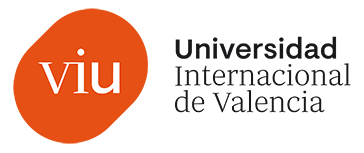

# **Análisis espacial de la calidad del aire en la Comunidad de Madrid**
## **Universidad Internacional de Valencia**


#### *Arpita Jiménez Morán*

<a name="indice"></a>
## **Índice del Google Colab**

0. [Preliminares de incorporación de Drive](#Preliminares)
1. [Introducción](#Introducción)
    1. [Descripción del problema](#DescripciónProblema)
    2. [Descripción de la base de datos](#DescripciónDatos)
2. [Extracción y transformación de la base de datos](#Extracción_Transformación)
3. [Valores atípicos](#Atípicos)
    1. [Gráfico de cajas](#BoxPlot)
    2. [Estadisticas descritivas](#Estadisticas)
4. [Verificación del tipo de valores de cada columna](#Verificación)
5. [Estaciones de estudio de la calidad del aire](#Estaciones)
6. [Análisis de la magnitud 14: Ozono Tropósferico](#Analisis1)
6. [Análisis de la magnitud 9: Partículas PM10](#Analisis2)
8. [Análisis de la magnitud 8: Dióxido de Nitrógeno](#Analisis3)




<a name="Preliminares"></a>
## **Preliminares de incorporación de Drive**
([Índice](#indice))

Montamos Google Drive en Colab

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Establecemos el directorio raíz donde se encuentran los archivos y datos del proyecto

In [4]:
BASE_FOLDER='/content/gdrive/MyDrive/TFM - Calidad del aire en la Comunidad de Madrid'

Agregamos el directorio a la lista de rutas donde Python buscará al intentar importar librerías

In [5]:
import sys

In [6]:
sys.path.append(BASE_FOLDER)

Ahora sí, el entorno está preparado para importar las librerías que se encuentran en este directorio

<a name="Introducción"></a>
## **Introducción**
([Índice](#indice))

<a name="DescripciónProblema"></a>
### **Descripción del problema**

Análisis exploratorio de los datos donde se evaluaran los tres contaminantes principales que afectan a la Comunidad de Madrid.

<a name="DescripciónDatos"></a>
### **Descripción de la base de datos**

La base de datos que se va utilizar en este TFM consta de las siguientes columnas:

*   **Provincia**: indica el valor de la provincia, en este caso el 28 que es Madrid
*   **Municipio**: indica la el municipio de estudio de la calidad del aire, en este caso el valor 79 que es la Comunidad de Madrid
*   **Estación**: indica la estación de la calidad del aire
*   **Magnitud**: indica el valor de la magnitud de estudio (En el
Cuadro 4.2 de la memoria del TFM aparecen todos los valores posibles de magnitud de estudio)
*  **Punto_Muestreo**: El campo punto de muestreo incluye el código de la estación completa (provincia, municipio y estación) más la magnitud y la técnica de muestreo
*   **Mes**: indica el valor del mes del registro
*   **Año**: indica el valor del año del registro
*   **D(XX)**: día del mes
*   **V(XX)**: dato validado o no

(*) Números desde el 01 al 31 de manera creciente, indicando los dias del mes


<a name="Extracción_Transformación"></a>
## **Extracción y transformación de la base de datos**
([Índice](#indice))

In [7]:
# Librerías
import os
import pandas as pd

Comprobación de la disponibilidad de los datos

In [12]:
data_folder = os.path.join(BASE_FOLDER, "data")

if os.path.exists(data_folder) and os.path.isdir(data_folder):
  csv_files = os.listdir(data_folder)

  print("Files in data folder:")
  for csv_file in csv_files:
      print(csv_file)
else:
    print("Data folder empty.")

Files in data folder:
datos01.csv
datos02.csv
datos03.csv
datos04.csv
datos05.csv
datos06.csv
datos07.csv
datos08.csv
datos09.csv
datos10.csv
datos11.csv
datos12.csv
datos13.csv
datos14.csv
datos15.csv
datos201612.csv
datos17.csv
datos201812.csv
datos201912.csv
datos202012.csv
datos202112.csv
datos202212.csv
datos202312.csv


Creación del conjunto global de datos

In [9]:
if os.path.exists(data_folder) and os.path.isdir(data_folder):
  csv_files = [file for file in os.listdir(data_folder) if file.endswith('.csv')]

  if csv_files:
    dfs = []
    for csv_file in csv_files:
      file_path = os.path.join(data_folder, csv_file)
      df = pd.read_csv(file_path, sep=';')
      dfs.append(df)

  database_df = pd.concat(dfs, ignore_index=True)

In [10]:
display(database_df)

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,28,79,4,1,28079004_1_38,2001,1,17.0,V,15.0,...,19.0,V,17.0,V,35.0,V,40.0,V,53.0,V
1,28,79,4,1,28079004_1_38,2001,2,40.0,V,42.0,...,20.0,V,22.0,V,0.0,N,0.0,N,0.0,N
2,28,79,4,1,28079004_1_38,2001,3,19.0,V,18.0,...,14.0,V,15.0,V,17.0,V,20.0,V,19.0,V
3,28,79,4,1,28079004_1_38,2001,4,14.0,V,17.0,...,12.0,V,13.0,V,15.0,V,14.0,V,0.0,N
4,28,79,4,1,28079004_1_38,2001,5,10.0,V,11.0,...,11.0,V,15.0,V,16.0,V,15.0,V,18.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,28,79,60,14,28079060_14_6,2023,8,103.0,V,63.0,...,72.0,V,69.0,V,63.0,V,74.0,V,71.0,V
33354,28,79,60,14,28079060_14_6,2023,9,70.0,V,49.0,...,53.0,V,61.0,V,62.0,V,72.0,V,0.0,N
33355,28,79,60,14,28079060_14_6,2023,10,66.0,V,53.0,...,54.0,V,61.0,V,58.0,V,53.0,V,17.0,V
33356,28,79,60,14,28079060_14_6,2023,11,35.0,V,63.0,...,30.0,V,41.0,V,62.0,V,68.0,V,0.0,N


In [11]:
print(database_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33358 entries, 0 to 33357
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PROVINCIA       33358 non-null  int64  
 1   MUNICIPIO       33358 non-null  int64  
 2   ESTACION        33358 non-null  int64  
 3   MAGNITUD        33358 non-null  int64  
 4   PUNTO_MUESTREO  33358 non-null  object 
 5   ANO             33358 non-null  int64  
 6   MES             33358 non-null  int64  
 7   D01             33358 non-null  float64
 8   V01             33358 non-null  object 
 9   D02             33358 non-null  float64
 10  V02             33358 non-null  object 
 11  D03             33358 non-null  float64
 12  V03             33358 non-null  object 
 13  D04             33358 non-null  float64
 14  V04             33358 non-null  object 
 15  D05             33358 non-null  float64
 16  V05             33358 non-null  object 
 17  D06             33358 non-null 

Como solo queremos estudiar las tres magnitudes principales que afectan a la Comunidad de Madrid, procederemos a reducir la base de datos en relación a las magnitudes.

In [18]:
magnitudes_interest = [8, 10, 14]
database_filtered_df = database_df[database_df['MAGNITUD'].isin(magnitudes_interest)].reset_index(drop=True)
display(database_filtered_df)

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,28,79,4,8,28079004_8_8,2001,1,58.0,V,60.0,...,54.0,V,33.0,V,61.0,V,74.0,V,63.0,V
1,28,79,4,8,28079004_8_8,2001,2,65.0,V,63.0,...,53.0,V,48.0,V,0.0,N,0.0,N,0.0,N
2,28,79,4,8,28079004_8_8,2001,3,62.0,V,63.0,...,61.0,V,54.0,V,45.0,V,48.0,V,53.0,V
3,28,79,4,8,28079004_8_8,2001,4,67.0,V,62.0,...,77.0,V,71.0,V,71.0,V,50.0,V,0.0,N
4,28,79,4,8,28079004_8_8,2001,5,60.0,V,66.0,...,81.0,V,100.0,V,98.0,V,105.0,V,105.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,28,79,60,14,28079060_14_6,2023,8,103.0,V,63.0,...,72.0,V,69.0,V,63.0,V,74.0,V,71.0,V
11029,28,79,60,14,28079060_14_6,2023,9,70.0,V,49.0,...,53.0,V,61.0,V,62.0,V,72.0,V,0.0,N
11030,28,79,60,14,28079060_14_6,2023,10,66.0,V,53.0,...,54.0,V,61.0,V,58.0,V,53.0,V,17.0,V
11031,28,79,60,14,28079060_14_6,2023,11,35.0,V,63.0,...,30.0,V,41.0,V,62.0,V,68.0,V,0.0,N


In [19]:
valores_provincia = database_df['PROVINCIA'].unique()
valores_municipio = database_df['MUNICIPIO'].unique()

print("Unique values for 'PROVINCIA' column:")
print(valores_provincia)

print("Unique values for 'MUNICIPIO' column:")
print(valores_municipio)

Unique values for 'PROVINCIA' column:
[28]
Unique values for 'MUNICIPIO' column:
[79]


Como se puede ver los datos de la columna y provincia son únicos, por lo que estos datos se pueden quitar de la base de datos ya que no aportan información relevante.

In [20]:
database_filtered_df.drop(columns=['PROVINCIA', 'MUNICIPIO'], inplace=True)
display(database_filtered_df)

,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,V02,D03,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,4,8,28079004_8_8,2001,1,58.0,V,60.0,V,65.0,...,54.0,V,33.0,V,61.0,V,74.0,V,63.0,V
1,4,8,28079004_8_8,2001,2,65.0,V,63.0,V,61.0,...,53.0,V,48.0,V,0.0,N,0.0,N,0.0,N
2,4,8,28079004_8_8,2001,3,62.0,V,63.0,V,56.0,...,61.0,V,54.0,V,45.0,V,48.0,V,53.0,V
3,4,8,28079004_8_8,2001,4,67.0,V,62.0,V,61.0,...,77.0,V,71.0,V,71.0,V,50.0,V,0.0,N
4,4,8,28079004_8_8,2001,5,60.0,V,66.0,V,82.0,...,81.0,V,100.0,V,98.0,V,105.0,V,105.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,60,14,28079060_14_6,2023,8,103.0,V,63.0,V,85.0,...,72.0,V,69.0,V,63.0,V,74.0,V,71.0,V
11029,60,14,28079060_14_6,2023,9,70.0,V,49.0,V,42.0,...,53.0,V,61.0,V,62.0,V,72.0,V,0.0,N
11030,60,14,28079060_14_6,2023,10,66.0,V,53.0,V,49.0,...,54.0,V,61.0,V,58.0,V,53.0,V,17.0,V
11031,60,14,28079060_14_6,2023,11,35.0,V,63.0,V,53.0,...,30.0,V,41.0,V,62.0,V,68.0,V,0.0,N


Gracias a esta reducción se ha disminuido tanto el número de coluumas como de filas de:


*   69 columnas a 67 columnas
*   33358 filas a 11033 filas



Es importante verificar que no existan datos vacíos de estudio.

Esto da integridad en los datos, generando así precisión en el análisis de datos y eficiencia en las consultas.

In [24]:
# Verificación de valores nulos y % de valores faltantes
missing_values = database_filtered_df.isnull().sum()
percentage_missing = (missing_values / len(database_filtered_df)) * 100

# Mostrar si hay valores faltantes y % por columna
missing_info = pd.DataFrame({'Columns with empty data': missing_values, '% empty data': percentage_missing})
print(missing_info)


                Columns with empty data  % empty data
ESTACION                              0           0.0
MAGNITUD                              0           0.0
PUNTO_MUESTREO                        0           0.0
ANO                                   0           0.0
MES                                   0           0.0
...                                 ...           ...
V29                                   0           0.0
D30                                   0           0.0
V30                                   0           0.0
D31                                   0           0.0
V31                                   0           0.0

[67 rows x 2 columns]


<a name="Atípicos"></a>
## **Valores atípicos**
([Índice](#indice))

En esta sección se revisaran los datos para verificar la existencia o no de valores atípicos, generando así problemas en la calidad de los datos o análisis futuros.

In [32]:
numeric_colum = database_filtered_df.select_dtypes(include=['int64', 'float64'])

Q1 = numeric_colum.quantile(0.25)
Q3 = numeric_colum.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_colum < (Q1 - 1.5 * IQR)) | (numeric_colum > (Q3 + 1.5 * IQR))).sum()
print(outliers)

ESTACION      0
MAGNITUD      0
ANO           0
MES           0
D01          57
D02          81
D03          68
D04          69
D05          68
D06          57
D07          71
D08          79
D09          73
D10          92
D11          80
D12          99
D13          98
D14         107
D15         121
D16          95
D17         121
D18          68
D19          41
D20          75
D21          81
D22         102
D23          69
D24          29
D25          29
D26          55
D27          65
D28          86
D29          59
D30          53
D31         102
dtype: int64


En el análisis anterior podemos observar el número de valores atípicos de cada columna.

Estos datos nos indica la presencia de datos atípicos en varios días del mes, destacando los días 14, 15, 17 y 22

A partir de esta información generaremos una serie de graficos de caja (box plots) para ver la distribución de los datos.

<a name="BoxPlot"></a>
### **Gráfico de caja (Box Plot)**
([Índice](#indice))

In [50]:
!pip install seaborn


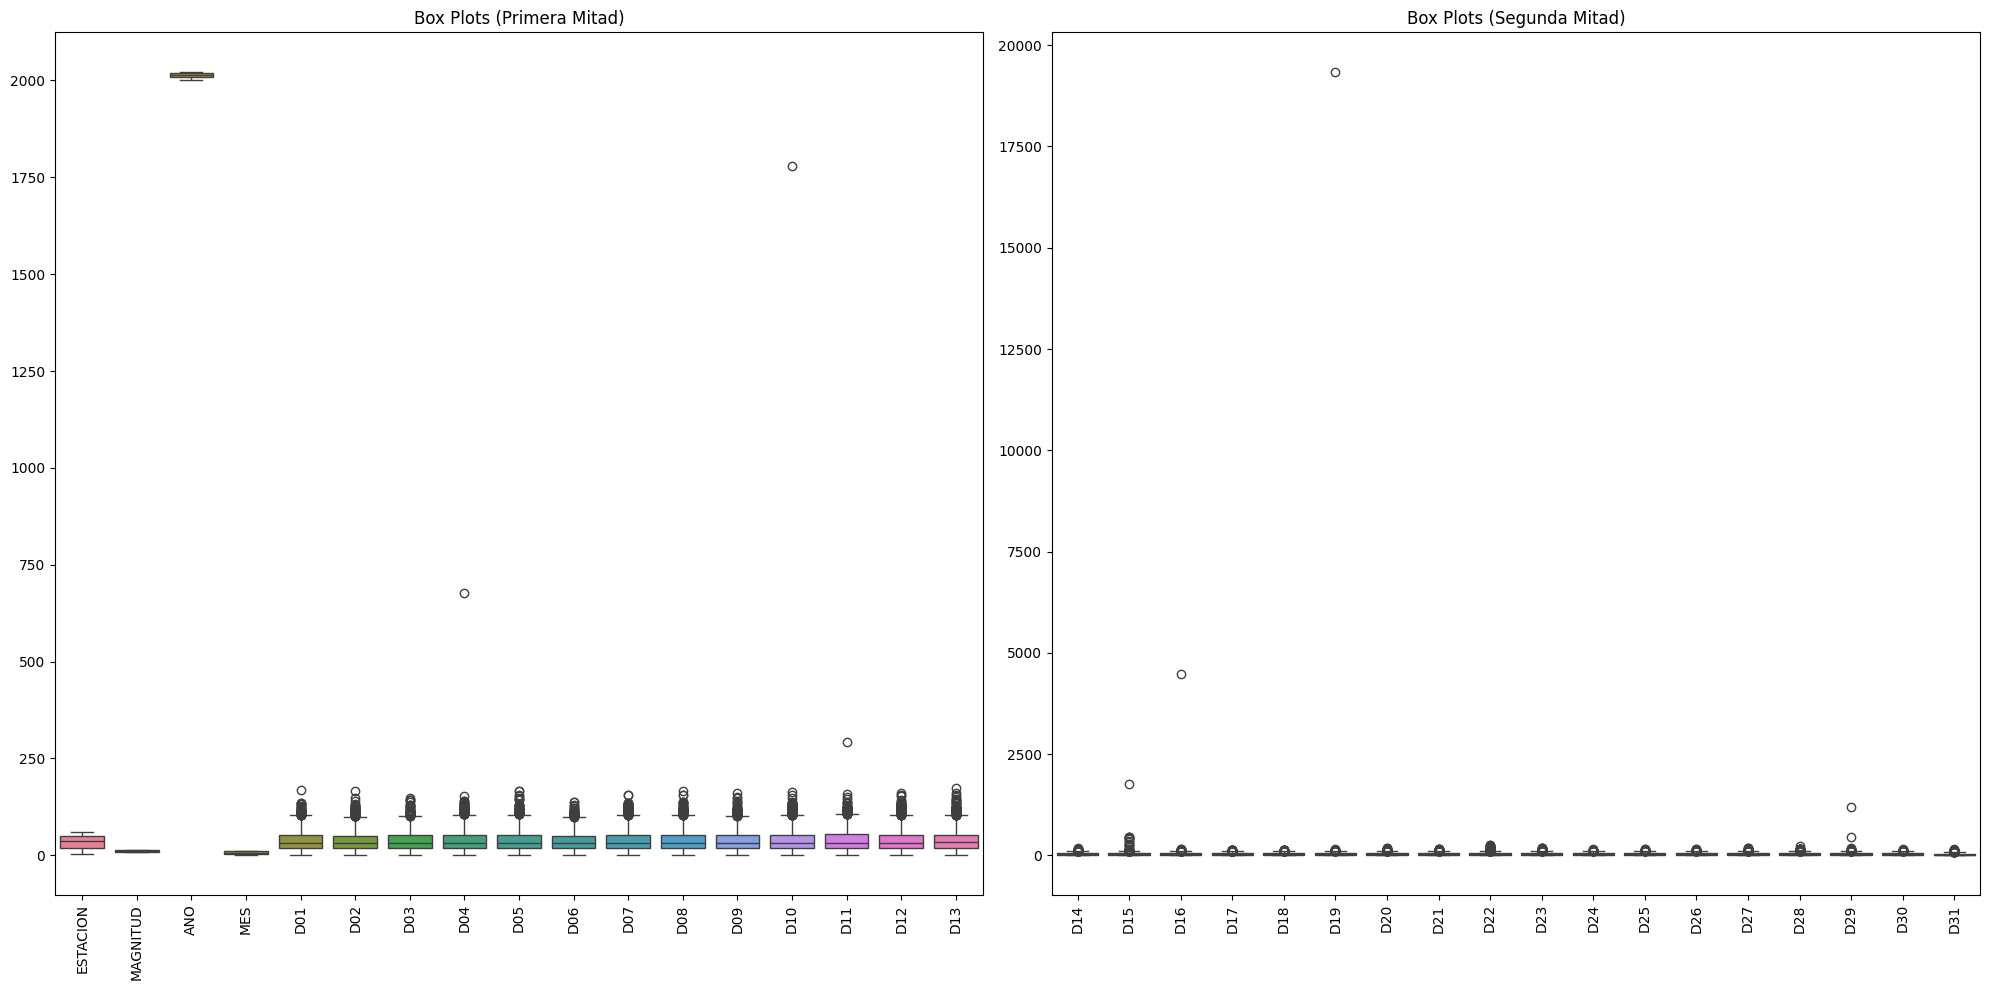

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = database_filtered_df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(20, 10))

num_columns = len(numeric_columns.columns)
mid_point = num_columns // 2

plt.subplot(1, 2, 1)
sns.boxplot(data=numeric_columns.iloc[:, :mid_point])
plt.xticks(rotation=90)
plt.title('Box Plots (Primera Mitad)')

plt.subplot(1, 2, 2)
sns.boxplot(data=numeric_columns.iloc[:, mid_point:])
plt.xticks(rotation=90)
plt.title('Box Plots (Segunda Mitad)')

plt.tight_layout()
plt.show()


<a name="Estadisticas"></a>
### **Estadísticas descriptivas**
([Índice](#indice))

Es importante realizar estadísticas descriptivas tanto con valores atípicos como sin ellos para comprender mejor la distribución y la variabilidad de los datos y para evaluar adecuadamente su impacto en nuestros análisis.

*  Con valores atípicos: Incluir los valores atípicos en las estadísticas
descriptivas nos proporciona una visión completa de la distribución de los datos, incluidas las observaciones extremas. Esto puede ser útil para comprender la variabilidad de los datos y para identificar posibles problemas o anomalías en los datos.


* Sin valores atípicos: Por otro lado, al calcular estadísticas descriptivas sin incluir valores atípicos, podemos obtener una medida más precisa de la tendencia central y la dispersión de los datos, ya que los valores extremos pueden distorsionar estas medidas. Esto nos permite evaluar la distribución y la variabilidad de los datos de manera más consistente y hacer inferencias más confiables sobre la población subyacente.

In [52]:
stats_per_day_with_outliers = pd.DataFrame()
stats_per_day_no_outliers = pd.DataFrame()

for day in range(1, 32):
    column_name = f'D{day:02}'

    stats_with_outliers = database_filtered_df[column_name].describe()
    stats_per_day_with_outliers[column_name] = stats_with_outliers

    data_no_outliers = database_filtered_df[~((database_filtered_df[column_name] < (Q1 - 1.5 * IQR)) | (database_filtered_df[column_name] > (Q3 + 1.5 * IQR)))]
    stats_no_outliers = data_no_outliers[column_name].describe()
    stats_per_day_no_outliers[column_name] = stats_no_outliers

stats_per_day_with_outliers = stats_per_day_with_outliers.T
stats_per_day_no_outliers = stats_per_day_no_outliers.T

print("Descriptive statistics for the 31 days with outliers:")
print(stats_per_day_with_outliers)
print("\nDescriptive statistics for the 31 days without outliers:")
print(stats_per_day_no_outliers)


Descriptive statistics for the 31 days with outliers:
       count       mean         std  min   25%   50%    75%      max
D01  11033.0  36.338919   22.796415  0.0  18.0  32.0  52.00    169.0
D02  11033.0  36.405323   22.410138  0.0  18.0  32.0  51.00    165.0
D03  11033.0  37.095793   22.750004  0.0  19.0  33.0  52.00    149.0
D04  11033.0  37.034600   24.486694  0.0  18.0  32.0  53.00    677.0
D05  11033.0  37.256405   23.701215  0.0  18.0  32.0  53.00    166.0
D06  11033.0  36.624271   21.853614  0.0  19.0  33.0  51.00    138.0
D07  11033.0  36.829025   22.855272  0.0  18.0  32.0  52.00    156.0
D08  11033.0  36.963598   22.844947  0.0  18.0  33.0  52.00    166.0
D09  11033.0  36.870169   22.592151  0.0  19.0  32.0  52.00    162.0
D10  11033.0  37.308004   28.923701  0.0  18.0  32.0  52.00   1780.0
D11  11033.0  37.895598   23.891216  0.0  19.0  33.0  54.00    292.0
D12  11033.0  37.805920   23.749848  0.0  19.0  33.0  53.00    162.0
D13  11033.0  37.846816   23.727099  0.0  19.0  3

In [49]:
means_per_day = pd.DataFrame()

for day in range(1, 32):
    column_name = f'D{day:02}'

    mean_with_outliers = database_filtered_df[column_name].mean()

    data_no_outliers = database_filtered_df[~((database_filtered_df[column_name] < (Q1 - 1.5 * IQR)) | (database_filtered_df[column_name] > (Q3 + 1.5 * IQR)))]
    mean_no_outliers = data_no_outliers[column_name].mean()

    means_per_day.loc['Mean with outliers', column_name] = mean_with_outliers
    means_per_day.loc['Mean without outliers', column_name] = mean_no_outliers

print("31-day averages with and without outliers:")
print(means_per_day)


31-day averages with and without outliers:
                             D01        D02        D03        D04        D05  \
Mean with outliers     36.338919  36.405323  37.095793  37.034600  37.256405   
Mean without outliers  35.949380  35.996259  36.707495  36.457732  36.703988   

                             D06        D07        D08        D09        D10  \
Mean with outliers     36.624271  36.829025  36.963598  36.870169  37.308004   
Mean without outliers  36.389634  36.312928  36.423431  36.464707  36.531785   

                       ...        D22        D23        D24        D25  \
Mean with outliers     ...  37.851522  37.917662  37.353002  37.249011   
Mean without outliers  ...  37.007578  37.377559  37.152369  37.038017   

                             D26        D27        D28        D29        D30  \
Mean with outliers     37.632460  37.467623  37.792601  35.239706  34.175006   
Mean without outliers  37.243572  36.991091  37.130060  34.708741  33.733331   

           

In [44]:
import pandas as pd

# Crear un DataFrame para almacenar las estadísticas descriptivas de los 31 días con y sin valores atípicos
stats_per_day_with_outliers = pd.DataFrame()
stats_per_day_no_outliers = pd.DataFrame()

# Calcular las estadísticas descriptivas para cada día con y sin valores atípicos y almacenarlas en los DataFrames correspondientes
for day in range(1, 32):
    column_name = f'D{day:02}'  # Nombre de la columna
    # Estadísticas descriptivas con valores atípicos
    stats_with_outliers = database_filtered_df[column_name].describe()
    stats_per_day_with_outliers[column_name] = stats_with_outliers
    # Eliminar valores atípicos y calcular estadísticas descriptivas
    data_no_outliers = database_filtered_df[~((database_filtered_df[column_name] < (Q1 - 1.5 * IQR)) | (database_filtered_df[column_name] > (Q3 + 1.5 * IQR)))]
    stats_no_outliers = data_no_outliers[column_name].describe()
    stats_per_day_no_outliers[column_name] = stats_no_outliers

# Transponer los DataFrames para que los días estén en filas y las estadísticas en columnas
stats_per_day_with_outliers = stats_per_day_with_outliers.T
stats_per_day_no_outliers = stats_per_day_no_outliers.T

# Comparar las estadísticas descriptivas y determinar si los valores atípicos afectan significativamente
significant_impact = (stats_per_day_with_outliers - stats_per_day_no_outliers).abs() > 0.1 * stats_per_day_with_outliers

# Crear una serie que resume si los valores atípicos tienen un impacto significativo en cada día
impact_summary = significant_impact.any(axis=1)

# Mostrar la serie de resumen del impacto
print("Resumen del impacto de los valores atípicos en cada día:")
print(impact_summary)


Resumen del impacto de los valores atípicos en cada día:
D01    True
D02    True
D03    True
D04    True
D05    True
D06    True
D07    True
D08    True
D09    True
D10    True
D11    True
D12    True
D13    True
D14    True
D15    True
D16    True
D17    True
D18    True
D19    True
D20    True
D21    True
D22    True
D23    True
D24    True
D25    True
D26    True
D27    True
D28    True
D29    True
D30    True
D31    True
dtype: bool


<a name="Estaciones"></a>
## **Estaciones de estudio de la calidad del aire**
([Índice](#indice))

En el gráfico de barras inferior se puede visualizar la completitud de los datos en cada estación de control de calidad del aire, destacando las estaciones 24, 18 y 8

ESTACION
24    828.0
18    823.0
8     781.0
40    552.0
36    552.0
16    548.0
35    548.0
39    546.0
38    545.0
60    504.0
17    454.0
27    421.0
56    360.0
57    340.0
47    338.0
54    338.0
58    338.0
59    338.0
49    336.0
55    336.0
50    334.0
48    326.0
11    275.0
4     272.0
dtype: float64


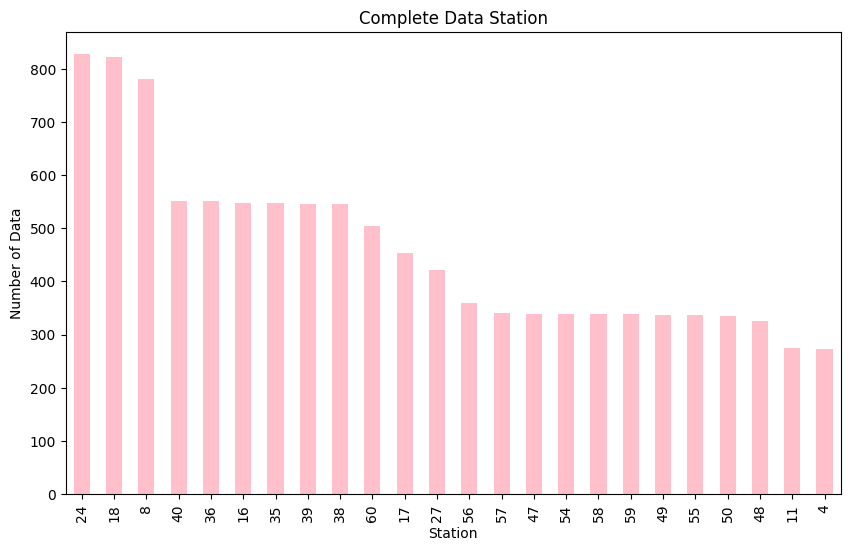

In [62]:
station = database_filtered_df.groupby('ESTACION').count().mean(axis=1)


sort_station = station.sort_values(ascending=False)

print(sort_station)

plt.figure(figsize=(10, 6))
sort_station.plot(kind='bar', color='pink')
plt.title('Complete Data Station')
plt.xlabel('Station')
plt.ylabel('Number of Data')
plt.show()


<a name="Analisis1"></a>
## **Análisis de la magnitud 14: Ozono Tropósferico**
([Índice](#indice))

Estudio de la magnitud 14 entre los años 2001 al 2023

In [159]:
def_year = '2001'


for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual_mean_2001 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 14:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 14: {overall_mean}")


Monthly means for the year 2001 for MAGNITUDE 14:
Month 1: 19.612903225806452
Month 2: 20.087557603686633
Month 3: 28.488479262672808
Month 4: 38.64516129032258
Month 5: 49.306451612903224
Month 6: 48.97849462365591
Month 7: 49.09139784946235
Month 8: 52.43870967741934
Month 9: 42.4516129032258
Month 10: 23.70967741935484
Month 11: 19.774193548387096
Month 12: 9.521505376344086

Overall mean for the year 2001 for MAGNITUDE 14: 33.50884536610342


In [96]:
def_year = '2002'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual_mean_2002 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 14:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 14: {overall_mean}")


Monthly means for the year 2002 for MAGNITUDE 14:
Month 1: 12.446236559139784
Month 2: 19.49462365591398
Month 3: 36.96774193548387
Month 4: 50.29032258064517
Month 5: 55.00537634408604
Month 6: 54.64516129032259
Month 7: 59.462365591397855
Month 8: 57.88172043010753
Month 9: 35.86021505376344
Month 10: 23.381720430107528
Month 11: 19.58986175115207
Month 12: 20.064516129032267

Overall mean for the year 2002 for MAGNITUDE 14: 37.09082181259601


In [97]:
def_year = '2003'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual_mean_2003 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 14:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 14: {overall_mean}")


Monthly means for the year 2003 for MAGNITUDE 14:
Month 1: 25.2626728110599
Month 2: 23.1705069124424
Month 3: 37.85714285714286
Month 4: 49.963133640553
Month 5: 54.147465437788014
Month 6: 56.612903225806456
Month 7: 58.44700460829493
Month 8: 65.59447004608295
Month 9: 45.05069124423964
Month 10: 29.12442396313364
Month 11: 19.82488479262673
Month 12: 16.43778801843318

Overall mean for the year 2003 for MAGNITUDE 14: 40.124423963133644


In [98]:
def_year = '2004'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual_mean_2004 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 14:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)

print(f"\nOverall mean for the year {def_year} for MAGNITUDE 14: {overall_mean}")

Monthly means for the year 2004 for MAGNITUDE 14:
Month 1: 16.603686635944698
Month 2: 18.981566820276498
Month 3: 38.29032258064516
Month 4: 51.25345622119816
Month 5: 50.617511520737324
Month 6: 57.15668202764977
Month 7: 60.14285714285715
Month 8: 54.47465437788019
Month 9: 38.54377880184331
Month 10: 28.9815668202765
Month 11: 13.419354838709678
Month 12: 19.110599078341014

Overall mean for the year 2004 for MAGNITUDE 14: 37.29800307219662


In [99]:
def_year = '2005'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual_mean_2005 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 14:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)

print(f"\nOverall mean for the year {def_year} for MAGNITUDE 14: {overall_mean}")

Monthly means for the year 2005 for MAGNITUDE 14:
Month 1: 17.28571428571429
Month 2: 29.35023041474654
Month 3: 38.77880184331797
Month 4: 53.188940092165886
Month 5: 53.096774193548384
Month 6: 54.35483870967741
Month 7: 63.70967741935485
Month 8: 51.33179723502304
Month 9: 36.271889400921665
Month 10: 23.935483870967733
Month 11: 18.718894009216587
Month 12: 17.51612903225806

Overall mean for the year 2005 for MAGNITUDE 14: 38.128264208909364


In [100]:
def_year = '2006'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual_mean_2006 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 14:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)

print(f"\nOverall mean for the year {def_year} for MAGNITUDE 14: {overall_mean}")

Monthly means for the year 2006 for MAGNITUDE 14:
Month 1: 17.580645161290327
Month 2: 20.037634408602152
Month 3: 34.946236559139784
Month 4: 44.47849462365592
Month 5: 51.822580645161295
Month 6: 64.56989247311829
Month 7: 69.69892473118279
Month 8: 65.17204301075269
Month 9: 39.043010752688176
Month 10: 26.247311827956985
Month 11: 16.306451612903228
Month 12: 16.625806451612902

Overall mean for the year 2006 for MAGNITUDE 14: 38.877419354838715


In [101]:
def_year = '2007'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual_mean_2007 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 14:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)

print(f"\nOverall mean for the year {def_year} for MAGNITUDE 14: {overall_mean}")

Monthly means for the year 2007 for MAGNITUDE 14:
Month 1: 12.561290322580646
Month 2: 24.167741935483875
Month 3: 36.14516129032259
Month 4: 45.655913978494624
Month 5: 46.56451612903225
Month 6: 44.86021505376344
Month 7: 58.13978494623656
Month 8: 59.72043010752688
Month 9: 44.43010752688172
Month 10: 27.26344086021505
Month 11: 15.510752688172042
Month 12: 13.053763440860216

Overall mean for the year 2007 for MAGNITUDE 14: 35.67275985663082


In [105]:
def_year = '2008'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual_mean_2008 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 14:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 14: {overall_mean}")

Monthly means for the year 2008 for MAGNITUDE 14:
Month 1: 17.51075268817204
Month 2: 22.403225806451612
Month 3: 43.71505376344086
Month 4: 50.252688172043
Month 5: 55.478494623655905
Month 6: 63.18817204301075
Month 7: 63.48924731182796
Month 8: 64.68279569892475
Month 9: 43.8978494623656
Month 10: 31.424731182795714
Month 11: 24.95698924731183
Month 12: 21.20967741935484


In [106]:
def_year = '2009'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual_mean_2009 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 14:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 14: {overall_mean}")

Monthly means for the year 2009 for MAGNITUDE 14:
Month 1: 26.29032258064516
Month 2: 26.037634408602152
Month 3: 47.69354838709677
Month 4: 59.61290322580647
Month 5: 62.01612903225807
Month 6: 56.77880184331797
Month 7: 66.66820276497695
Month 8: 69.05529953917052
Month 9: 60.29493087557603
Month 10: 30.543778801843313
Month 11: 27.958525345622107
Month 12: 23.167155425219935


In [107]:
def_year = '2010'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual_mean_2010 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 14:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 14: {overall_mean}")

Monthly means for the year 2010 for MAGNITUDE 14:
Month 1: 28.42165898617512
Month 2: 36.54377880184331
Month 3: 50.370967741935495
Month 4: 60.44239631336405
Month 5: 66.10138248847926
Month 6: 57.63133640552994
Month 7: 65.47235023041473
Month 8: 56.77188940092166
Month 9: 44.30024813895781
Month 10: 32.65260545905707
Month 11: 27.52073732718894
Month 12: 19.617511520737324


In [109]:
def_year = '2011'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual_mean_2011 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 14:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 14: {overall_mean}")

Monthly means for the year 2011 for MAGNITUDE 14:
Month 1: 21.313364055299537
Month 2: 26.43778801843318
Month 3: 49.50691244239633
Month 4: 57.77649769585254
Month 5: 58.83179723502304
Month 6: 63.48847926267281
Month 7: 67.12442396313364
Month 8: 63.13133640552995
Month 9: 48.73963133640553
Month 10: 33.97926267281107
Month 11: 20.672811059907836
Month 12: 16.39400921658986


In [110]:
def_year = '2012'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual_mean_2012 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 14:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 14: {overall_mean}")

Monthly means for the year 2012 for MAGNITUDE 14:
Month 1: 15.122119815668201
Month 2: 31.86175115207373
Month 3: 43.06682027649771
Month 4: 54.75345622119816
Month 5: 53.57142857142858
Month 6: 55.375576036866356
Month 7: 64.76497695852535
Month 8: 53.705069124423964
Month 9: 46.562211981566804
Month 10: 26.258064516129032
Month 11: 23.24423963133641
Month 12: 17.716589861751153


In [113]:
def_year = '2013'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual_mean_2013 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 14:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 14: {overall_mean}")

Monthly means for the year 2013 for MAGNITUDE 14:
Month 1: 26.09447004608295
Month 2: 32.21889400921659
Month 3: 48.122119815668206
Month 4: 56.96774193548387
Month 5: 65.02995391705069
Month 6: 71.28571428571426
Month 7: 82.81797235023042
Month 8: 73.94700460829493
Month 9: 51.71198156682028
Month 10: 29.112903225806452
Month 11: 28.56451612903226
Month 12: 21.578341013824886


In [114]:
def_year = '2014'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual_mean_2014 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 14:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 14: {overall_mean}")

Monthly means for the year 2014 for MAGNITUDE 14:
Month 1: 34.41244239631337
Month 2: 37.052995391705075
Month 3: 50.56221198156683
Month 4: 51.88479262672811
Month 5: 72.26267281105991
Month 6: 73.67741935483872
Month 7: 76.1221198156682
Month 8: 71.16820276497695
Month 9: 50.94470046082947
Month 10: 34.87327188940093
Month 11: 34.84101382488478
Month 12: 21.509216589861754


In [115]:
def_year = '2015'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual_mean_2015 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 14:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 14: {overall_mean}")

Monthly means for the year 2015 for MAGNITUDE 14:
Month 1: 22.735023041474655
Month 2: 43.15437788018432
Month 3: 45.47235023041474
Month 4: 61.64055299539169
Month 5: 70.41705069124426
Month 6: 79.64285714285712
Month 7: 77.66589861751154
Month 8: 69.26267281105991
Month 9: 54.60829493087557
Month 10: 32.09907834101382
Month 11: 23.354838709677416
Month 12: 14.506912442396313


In [127]:
def_year = '2016'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual_mean_2016 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 14:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 14: {overall_mean}")

Monthly means for the year 2016 for MAGNITUDE 14:
Month 1: 30.615207373271886
Month 2: 40.276497695852534
Month 3: 52.65207373271888
Month 4: 52.338709677419345
Month 5: 60.753456221198164
Month 6: 64.46774193548387
Month 7: 78.58986175115207
Month 8: 71.23041474654377
Month 9: 50.41935483870967
Month 10: 32.518433179723495
Month 11: 22.748847926267285
Month 12: 17.728110599078345

Overall mean for the year 2016 for MAGNITUDE 14: 47.86155913978495


In [128]:
def_year = '2017'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual_mean_2017 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 14:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 14: {overall_mean}")


Monthly means for the year 2017 for MAGNITUDE 14:
Month 1: 26.635944700460833
Month 2: 33.45622119815668
Month 3: 48.53686635944699
Month 4: 66.58525345622121
Month 5: 66.47235023041473
Month 6: 69.58294930875577
Month 7: 64.59907834101382
Month 8: 65.70046082949307
Month 9: 49.93778801843318
Month 10: 33.525345622119815
Month 11: 20.774193548387103
Month 12: 23.373271889400925

Overall mean for the year 2017 for MAGNITUDE 14: 47.43164362519201


In [118]:
def_year = '2018'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual_mean_2018 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 14:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 14: {overall_mean}")


Monthly means for the year 2018 for MAGNITUDE 14:
Month 1: 25.33179723502304
Month 2: 32.154377880184335
Month 3: 58.99539170506911
Month 4: 57.09677419354839
Month 5: 66.19815668202766
Month 6: 65.63364055299537
Month 7: 80.18202764976958
Month 8: 75.64516129032258
Month 9: 59.488479262672804
Month 10: 37.463133640553
Month 11: 29.126728110599082
Month 12: 15.248847926267281


In [119]:
def_year = '2019'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual_mean_2019 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 14:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 14: {overall_mean}")


Monthly means for the year 2019 for MAGNITUDE 14:
Month 1: 25.755760368663594
Month 2: 28.258064516129036
Month 3: 54.83640552995393
Month 4: 64.81797235023042
Month 5: 69.81566820276497
Month 6: 71.40783410138248
Month 7: 77.73732718894009
Month 8: 62.133640552995395
Month 9: 52.12442396313364
Month 10: 33.08064516129032
Month 11: 40.32027649769585
Month 12: 27.336405529953915


In [121]:
def_year = '2020'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual_mean_2020 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 14:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 14: {overall_mean}")


Monthly means for the year 2020 for MAGNITUDE 14:
Month 1: 25.032258064516128
Month 2: 23.59216589861751
Month 3: 56.10138248847926
Month 4: 59.83640552995393
Month 5: 68.50230414746545
Month 6: 67.70276497695853
Month 7: 78.28571428571428
Month 8: 64.58064516129033
Month 9: 56.0115207373272
Month 10: 41.83179723502304
Month 11: 19.002304147465438
Month 12: 35.2741935483871


In [120]:
def_year = '2021'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual_mean_2021 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 14:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 14: {overall_mean}")


Monthly means for the year 2021 for MAGNITUDE 14:
Month 1: 30.975186104218366
Month 2: 33.866004962779165
Month 3: 47.78411910669975
Month 4: 53.689826302729536
Month 5: 66.2655086848635
Month 6: 69.7047146401985
Month 7: 74.81389578163771
Month 8: 72.02977667493796
Month 9: 49.06451612903226
Month 10: 41.25806451612903
Month 11: 34.03970223325062
Month 12: 29.186104218362292


In [122]:
def_year = '2022'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual_mean_2022 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 14:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 14: {overall_mean}")


Monthly means for the year 2022 for MAGNITUDE 14:
Month 1: 28.851116625310173
Month 2: 33.68779156327544
Month 3: 53.51069478908189
Month 4: 62.42473945409429
Month 5: 70.99151364764269
Month 6: 60.27044665012407
Month 7: 82.06725806451612
Month 8: 75.50629032258064
Month 9: 52.26818858560794
Month 10: 36.71468982630273
Month 11: 33.66019851116626
Month 12: 25.302332506203477


In [123]:
def_year = '2023'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 14) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual_mean_2023 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 14:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 14: {overall_mean}")

Monthly means for the year 2023 for MAGNITUDE 14:
Month 1: 33.13895781637717
Month 2: 37.25558312655087
Month 3: 53.11166253101738
Month 4: 65.94044665012404
Month 5: 76.90570719602978
Month 6: 75.83622828784118
Month 7: 78.11910669975185
Month 8: 75.66749379652603
Month 9: 52.98263027295287
Month 10: 51.032258064516135
Month 11: 34.11021505376344
Month 12: 24.027295285359802


In [160]:
annual_means_list = []

for year in range(2001, 2024):
    variable_name = f"annual_mean_{year}"
    if variable_name in locals():
        annual_mean = locals()[variable_name]
        annual_means_list.append(annual_mean)
    else:
        annual_means_list.append('Empty')

annual_means_df = pd.DataFrame({
    'Año': range(2001, 2024),
    'Media Anual': annual_means_list
})

print(annual_means_df)


     Año  Media Anual
0   2001    33.508845
1   2002    29.967204
2   2003    31.419086
3   2004    29.719892
4   2005    32.359319
5   2006    34.165771
6   2007    29.290771
7   2008    41.850806
8   2009    46.343103
9   2010    45.487239
10  2011    43.949693
11  2012    40.500192
12  2013    48.954301
13  2014    50.775922
14  2015    49.546659
15  2016    47.861559
16  2017    47.431644
17  2018    50.213710
18  2019    50.635369
19  2020    49.646121
20  2021    50.223118
21  2022    51.271272
22  2023    54.843965


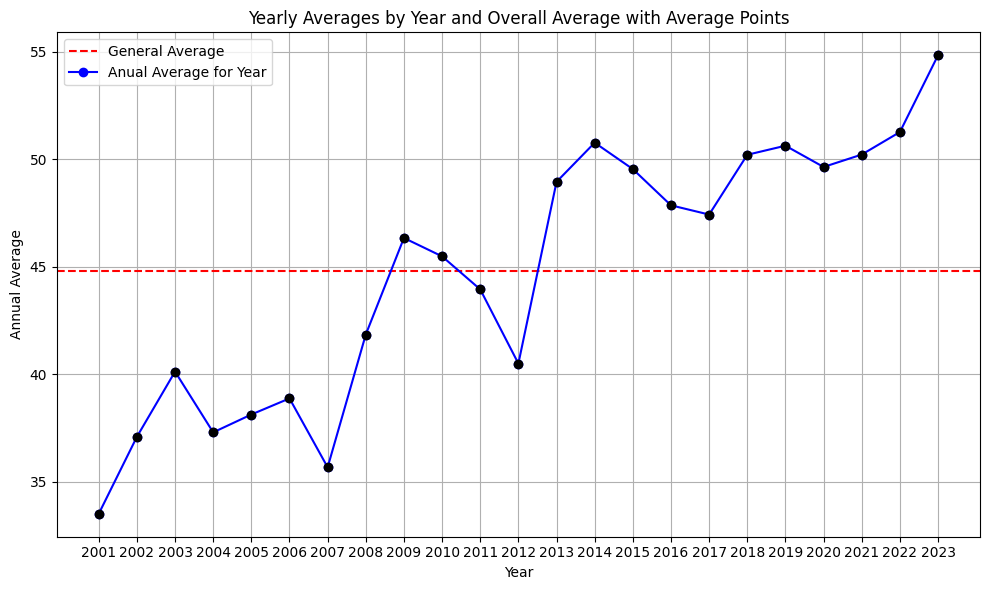

In [137]:

overall_mean = annual_means_df['Media Anual'].mean()

fig, ax = plt.subplots(figsize=(10, 6))

plt.axhline(y=overall_mean, color='red', linestyle='--', label='General Average')

plt.plot(annual_means_df['Año'], annual_means_df['Media Anual'], marker='o', color='blue', label='Anual Average for Year')

for year, mean in zip(annual_means_df['Año'], annual_means_df['Media Anual']):
    plt.plot(year, mean, marker='o', color='black')

plt.title('Yearly Averages by Year and Overall Average with Average Points')
plt.xlabel('Year')
plt.ylabel('Annual Average')
plt.xticks(range(2001, 2024))

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


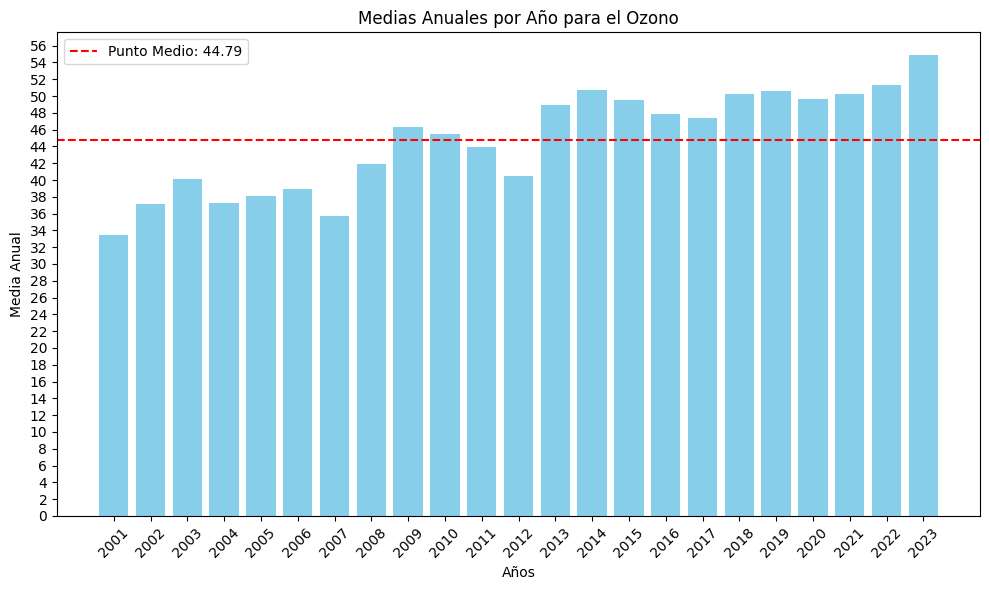

In [ ]:

# Datos actualizados de medias anuales por año
años = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
        '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
        '2021', '2022', '2023']
medias_anuales = [33.50884536610342, 37.09082181259601, 40.124423963133644, 37.29800307219662,
                  38.128264208909364, 38.877419354838715, 35.67275985663082, 41.850806451612904,
                  46.34310268584462, 45.487238567883736, 43.949692780337934, 40.500192012288785,
                  48.95430107526882, 50.77592165898619, 49.54665898617512, 47.86155913978495,
                  47.43164362519201, 50.21370967741935, 50.63536866359448, 49.64612135176652,
                  50.223118279569896, 51.271271712158814, 54.84396539840088]

# Convertir valores 'None' a 'nan'
medias_anuales = [valor if valor is not None else float('nan') for valor in medias_anuales]

# Calcular el punto medio
punto_medio = np.nanmean(medias_anuales)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(años, medias_anuales, color='skyblue')
plt.axhline(y=punto_medio, color='red', linestyle='--', label=f'Punto Medio: {punto_medio:.2f}')
plt.title('Medias Anuales por Año para el Ozono')
plt.xlabel('Años')
plt.ylabel('Media Anual')
plt.xticks(rotation=45)  # Rotar los años para mejor visualización
plt.yticks(np.arange(0, max(medias_anuales) + 2, 2))  # Ajustar los valores del eje y
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()


<a name="Analisis2"></a>
## **Análisis de la magnitud 10: Partículas PM10**
([Índice](#indice))

Estudio de la magnitud 10 entre los años 2001 al 2023

In [161]:
def_year = '2001'


for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2001 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")


Monthly means for the year 2001 for MAGNITUDE 10:
Month 1: 28.983870967741932
Month 2: 26.33870967741936
Month 3: 23.44516129032259
Month 4: 21.672043010752684
Month 5: 27.66129032258064
Month 6: 39.61290322580644
Month 7: 30.569892473118276
Month 8: 36.55483870967742
Month 9: 31.68387096774193
Month 10: 29.477419354838705
Month 11: 30.65161290322581
Month 12: 46.98709677419355

Overall mean for the year 2001 for MAGNITUDE 10: 31.136559139784946


In [206]:
def_year = '2002'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2002 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")


Monthly means for the year 2002 for MAGNITUDE 8:
Month 1: 68.8533724340176
Month 2: 58.02052785923753
Month 3: 57.79472140762463
Month 4: 58.72434017595308
Month 5: 44.19354838709678
Month 6: 46.510263929618766
Month 7: 45.988269794721404
Month 8: 45.52785923753665
Month 9: 52.797653958944274
Month 10: 54.475073313782985
Month 11: 51.90860215053763
Month 12: 55.5537634408602

Overall mean for the year 2002 for MAGNITUDE 8: 53.36233300749429


In [165]:
def_year = '2003'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2003 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")


Monthly means for the year 2003 for MAGNITUDE 10:
Month 1: 24.478494623655912
Month 2: 19.774193548387093
Month 3: 36.155913978494624
Month 4: 25.46236559139785
Month 5: 32.00537634408601
Month 6: 44.11290322580644
Month 7: 37.26881720430107
Month 8: 39.1505376344086
Month 9: 35.188172043010745
Month 10: 21.258064516129032
Month 11: 29.748387096774195
Month 12: 32.4258064516129

Overall mean for the year 2003 for MAGNITUDE 10: 31.419086021505375


In [166]:
def_year = '2004'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2004 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)

print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")

Monthly means for the year 2004 for MAGNITUDE 10:
Month 1: 27.174193548387095
Month 2: 30.387096774193548
Month 3: 29.309677419354845
Month 4: 20.612903225806452
Month 5: 20.32903225806451
Month 6: 22.596774193548384
Month 7: 36.81935483870968
Month 8: 30.122580645161293
Month 9: 41.27741935483871
Month 10: 30.961290322580645
Month 11: 37.76881720430108
Month 12: 29.279569892473123

Overall mean for the year 2004 for MAGNITUDE 10: 29.71989247311828


In [167]:
def_year = '2005'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2005 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)

print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")

Monthly means for the year 2005 for MAGNITUDE 10:
Month 1: 41.18817204301075
Month 2: 22.17741935483871
Month 3: 35.33333333333333
Month 4: 22.172043010752684
Month 5: 28.478494623655916
Month 6: 32.8494623655914
Month 7: 36.58064516129032
Month 8: 39.698924731182785
Month 9: 36.09139784946235
Month 10: 34.06989247311827
Month 11: 30.709677419354843
Month 12: 28.962365591397855

Overall mean for the year 2005 for MAGNITUDE 10: 32.359318996415766


In [168]:
def_year = '2006'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2006 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)

print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")

Monthly means for the year 2006 for MAGNITUDE 10:
Month 1: 29.032258064516128
Month 2: 36.20967741935485
Month 3: 26.924731182795693
Month 4: 25.532258064516125
Month 5: 38.52150537634409
Month 6: 39.069892473118266
Month 7: 42.93548387096775
Month 8: 33.193548387096776
Month 9: 36.83870967741935
Month 10: 36.075268817204304
Month 11: 31.338709677419356
Month 12: 34.31720430107527

Overall mean for the year 2006 for MAGNITUDE 10: 34.16577060931899


In [169]:
def_year = '2007'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2007 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)

print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")

Monthly means for the year 2007 for MAGNITUDE 10:
Month 1: 40.12365591397848
Month 2: 25.290322580645157
Month 3: 24.81720430107527
Month 4: 25.209677419354836
Month 5: 25.021505376344084
Month 6: 20.22043010752688
Month 7: 30.172043010752684
Month 8: 34.86559139784946
Month 9: 32.12903225806452
Month 10: 26.752688172043015
Month 11: 34.978494623655905
Month 12: 31.908602150537625

Overall mean for the year 2007 for MAGNITUDE 10: 29.290770609318987


In [170]:
def_year = '2008'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2008 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")

Monthly means for the year 2008 for MAGNITUDE 10:
Month 1: 29.456989247311828
Month 2: 26.204301075268816
Month 3: 19.31182795698924
Month 4: 20.672043010752688
Month 5: 21.55376344086021
Month 6: 21.88709677419355
Month 7: 28.284946236559136
Month 8: 29.096774193548388
Month 9: 25.274193548387096
Month 10: 32.2741935483871
Month 11: 19.451612903225808
Month 12: 21.80645161290322

Overall mean for the year 2008 for MAGNITUDE 10: 24.606182795698924


In [171]:
def_year = '2009'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2009 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")

Monthly means for the year 2009 for MAGNITUDE 10:
Month 1: 17.612903225806452
Month 2: 21.032258064516128
Month 3: 24.43225806451613
Month 4: 15.198924731182794
Month 5: 24.18817204301075
Month 6: 25.354838709677423
Month 7: 29.994623655913983
Month 8: 28.747311827956985
Month 9: 24.370967741935488
Month 10: 25.68279569892473
Month 11: 23.0
Month 12: 15.858870967741936

Overall mean for the year 2009 for MAGNITUDE 10: 22.956160394265236


In [172]:
def_year = '2010'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2010 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")

Monthly means for the year 2010 for MAGNITUDE 10:
Month 1: 14.500000000000002
Month 2: 13.152492668621706
Month 3: 24.37536656891496
Month 4: 18.143695014662757
Month 5: 19.768328445747798
Month 6: 18.37903225806452
Month 7: 23.798387096774192
Month 8: 27.252688172043005
Month 9: 24.895161290322577
Month 10: 25.177419354838708
Month 11: 17.411290322580648
Month 12: 19.08333333333334

Overall mean for the year 2010 for MAGNITUDE 10: 20.494766210492017


In [173]:
def_year = '2011'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2011 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")

Monthly means for the year 2011 for MAGNITUDE 10:
Month 1: 20.086021505376348
Month 2: 21.411290322580644
Month 3: 18.76612903225806
Month 4: 26.126344086021497
Month 5: 19.913978494623656
Month 6: 22.946236559139788
Month 7: 21.239247311827953
Month 8: 23.38440860215053
Month 9: 26.10215053763441
Month 10: 28.65860215053763
Month 11: 19.225806451612907
Month 12: 22.868279569892472

Overall mean for the year 2011 for MAGNITUDE 10: 22.56070788530465


In [174]:
def_year = '2012'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2012 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")

Monthly means for the year 2012 for MAGNITUDE 10:
Month 1: 20.916666666666664
Month 2: 15.067204301075266
Month 3: 22.293010752688172
Month 4: 13.225806451612904
Month 5: 22.376344086021504
Month 6: 37.577956989247305
Month 7: 30.663978494623652
Month 8: 42.20967741935484
Month 9: 22.04569892473118
Month 10: 20.083333333333336
Month 11: 16.11021505376344
Month 12: 15.763440860215054

Overall mean for the year 2012 for MAGNITUDE 10: 23.194444444444443


In [178]:
def_year = '2013'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2013 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")

Monthly means for the year 2013 for MAGNITUDE 10:
Month 1: 13.82795698924731
Month 2: 10.41935483870968
Month 3: 11.787634408602148
Month 4: 16.037634408602152
Month 5: 14.161290322580644
Month 6: 21.10483870967742
Month 7: 34.65053763440861
Month 8: 28.365591397849464
Month 9: 21.25268817204301
Month 10: 19.056451612903228
Month 11: 13.626344086021504
Month 12: 15.897849462365588

Overall mean for the year 2013 for MAGNITUDE 10: 18.349014336917566


In [179]:
def_year = '2014'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2014 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")

Monthly means for the year 2014 for MAGNITUDE 10:
Month 1: 13.048387096774194
Month 2: 11.201612903225804
Month 3: 19.22849462365591
Month 4: 16.71236559139785
Month 5: 17.18279569892473
Month 6: 19.594086021505376
Month 7: 21.346774193548388
Month 8: 22.118279569892476
Month 9: 19.54569892473118
Month 10: 26.895161290322577
Month 11: 20.763440860215052
Month 12: 20.01075268817204

Overall mean for the year 2014 for MAGNITUDE 10: 18.9706541218638


In [180]:
def_year = '2015'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2015 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")

Monthly means for the year 2015 for MAGNITUDE 10:
Month 1: 17.983870967741936
Month 2: 10.524193548387096
Month 3: 16.809139784946236
Month 4: 17.478494623655916
Month 5: 20.887096774193544
Month 6: 20.782258064516128
Month 7: 26.905913978494617
Month 8: 25.833333333333336
Month 9: 15.803763440860216
Month 10: 69.747311827957
Month 11: 21.236559139784948
Month 12: 32.096774193548384

Overall mean for the year 2015 for MAGNITUDE 10: 24.674059139784948


In [181]:
def_year = '2016'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2016 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")

Monthly means for the year 2016 for MAGNITUDE 10:
Month 1: 14.623655913978494
Month 2: 19.784946236559144
Month 3: 13.771505376344086
Month 4: 10.317204301075268
Month 5: 12.932795698924732
Month 6: 20.137096774193544
Month 7: 25.690860215053764
Month 8: 24.61827956989247
Month 9: 22.90591397849462
Month 10: 23.978494623655916
Month 11: 16.774193548387096
Month 12: 19.06451612903226

Overall mean for the year 2016 for MAGNITUDE 10: 18.716621863799283


In [182]:
def_year = '2017'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2017 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")


Monthly means for the year 2017 for MAGNITUDE 10:
Month 1: 19.674731182795693
Month 2: 23.36559139784946
Month 3: 17.075268817204304
Month 4: 16.650537634408604
Month 5: 16.610215053763444
Month 6: 22.903225806451612
Month 7: 22.817204301075268
Month 8: 23.338709677419356
Month 9: 16.241935483870968
Month 10: 20.239247311827956
Month 11: 19.696236559139788
Month 12: 15.948924731182796

Overall mean for the year 2017 for MAGNITUDE 10: 19.54681899641577


In [183]:
def_year = '2018'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2018 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")


Monthly means for the year 2018 for MAGNITUDE 10:
Month 1: 14.623655913978492
Month 2: 11.876344086021504
Month 3: 7.903225806451615
Month 4: 28.384408602150536
Month 5: 12.860215053763442
Month 6: 18.056451612903224
Month 7: 21.970430107526884
Month 8: 30.311827956989255
Month 9: 23.752688172043005
Month 10: 16.954301075268816
Month 11: 13.470430107526884
Month 12: 22.642473118279568

Overall mean for the year 2018 for MAGNITUDE 10: 18.567204301075268


In [184]:
def_year = '2019'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2019 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")


Monthly means for the year 2019 for MAGNITUDE 10:
Month 1: 20.97022332506203
Month 2: 23.28287841191067
Month 3: 17.012406947890817
Month 4: 11.836228287841191
Month 5: 12.181141439205957
Month 6: 19.87344913151365
Month 7: 25.004962779156326
Month 8: 16.325062034739453
Month 9: 16.312655086848633
Month 10: 17.49627791563275
Month 11: 9.094292803970225
Month 12: 14.796526054590572

Overall mean for the year 2019 for MAGNITUDE 10: 17.015508684863523


In [185]:
def_year = '2020'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2020 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")


Monthly means for the year 2020 for MAGNITUDE 10:
Month 1: 21.49875930521091
Month 2: 24.895781637717125
Month 3: 12.464019851116626
Month 4: 8.684863523573199
Month 5: 12.33250620347395
Month 6: 13.590570719602978
Month 7: 22.893300248138953
Month 8: 16.838709677419356
Month 9: 16.014888337468985
Month 10: 14.106699751861042
Month 11: 19.327543424317614
Month 12: 13.33498759305211

Overall mean for the year 2020 for MAGNITUDE 10: 16.331885856079406


In [186]:
def_year = '2021'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2021 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")


Monthly means for the year 2021 for MAGNITUDE 10:
Month 1: 14.635235732009921
Month 2: 21.719602977667492
Month 3: 24.83870967741935
Month 4: 13.955334987593051
Month 5: 13.856079404466502
Month 6: 19.215880893300245
Month 7: 22.652605459057067
Month 8: 27.905707196029777
Month 9: 15.947890818858564
Month 10: 17.129032258064516
Month 11: 11.508684863523571
Month 12: 13.987593052109183

Overall mean for the year 2021 for MAGNITUDE 10: 18.1126964433416


In [187]:
def_year = '2022'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2022 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")


Monthly means for the year 2022 for MAGNITUDE 10:
Month 1: 14.168734491315139
Month 2: 14.617866004962778
Month 3: 29.66004962779156
Month 4: 11.732009925558312
Month 5: 19.466501240694786
Month 6: 25.82133995037221
Month 7: 35.54342431761786
Month 8: 29.55086848635236
Month 9: 16.679900744416877
Month 10: 28.774193548387096
Month 11: 13.925558312655086
Month 12: 17.50620347394541

Overall mean for the year 2022 for MAGNITUDE 10: 21.453887510339126


In [188]:
def_year = '2023'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2023 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")

Monthly means for the year 2023 for MAGNITUDE 10:
Month 1: 15.585607940446652
Month 2: 19.62779156327544
Month 3: 16.15880893300248
Month 4: 16.75186104218362
Month 5: 14.607940446650124
Month 6: 18.27543424317618
Month 7: 22.84863523573201
Month 8: 23.47642679900744
Month 9: 20.69478908188585
Month 10: 19.310173697270475
Month 11: 16.739454094292803
Month 12: 19.85111662531017

Overall mean for the year 2023 for MAGNITUDE 10: 18.660669975186103


In [189]:
annual_means_list10 = []
overall_mean_all = []

for year in range(2001, 2024):
    variable_name = f"annual10_mean_{year}"
    if variable_name in locals():
        annual_mean = locals()[variable_name]
        annual_means_list10.append(annual_mean)
    else:
        annual_means_list10.append('Empty')

    if annual_means_list10[-1] != 'Empty':
        overall_mean_all.append(annual_means_list10[-1])

annual_means_df10 = pd.DataFrame({
    'Año': range(2001, 2024),
    'Media Anual': annual_means_list10
})

overall_mean = sum(overall_mean_all) / len(overall_mean_all)

print(annual_means_df10)



     Año  Media Anual
0   2001    31.136559
1   2002    29.967204
2   2003    31.419086
3   2004    29.719892
4   2005    32.359319
5   2006    34.165771
6   2007    29.290771
7   2008    24.606183
8   2009    22.956160
9   2010    20.494766
10  2011    22.560708
11  2012    23.194444
12  2013    18.349014
13  2014    18.970654
14  2015    24.674059
15  2016    18.716622
16  2017    19.546819
17  2018    18.567204
18  2019    17.015509
19  2020    16.331886
20  2021    18.112696
21  2022    21.453888
22  2023    18.660670


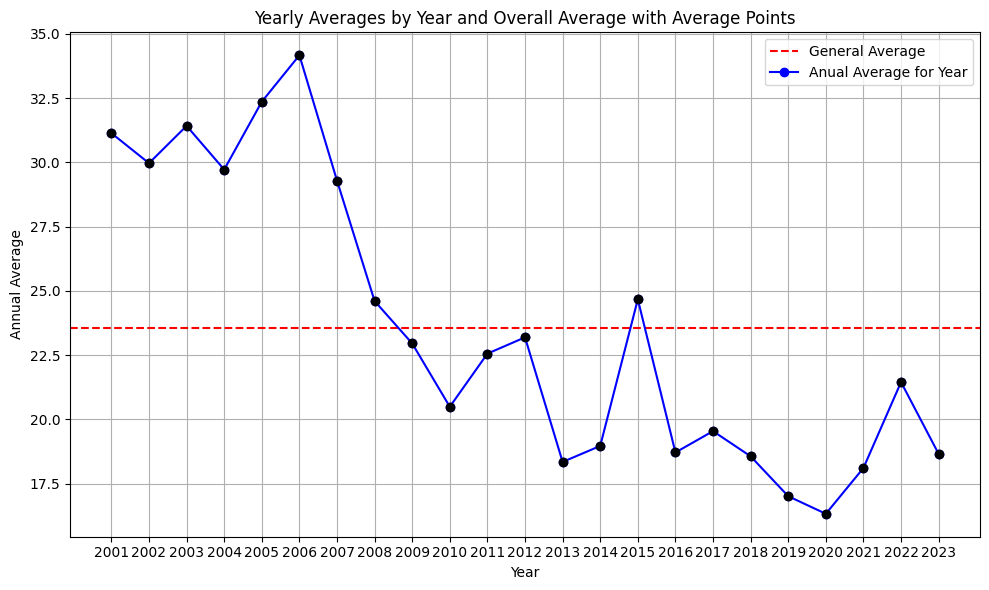

In [191]:
overall_mean = annual_means_df10['Media Anual'].mean()

fig, ax = plt.subplots(figsize=(10, 6))

plt.axhline(y=overall_mean, color='red', linestyle='--', label='General Average')

plt.plot(annual_means_df10['Año'], annual_means_df10['Media Anual'], marker='o', color='blue', label='Anual Average for Year')

for year, mean in zip(annual_means_df10['Año'], annual_means_df10['Media Anual']):
    plt.plot(year, mean, marker='o', color='black')

plt.title('Yearly Averages by Year and Overall Average with Average Points')
plt.xlabel('Year')
plt.ylabel('Annual Average')
plt.xticks(range(2001, 2024))

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


<a name="Analisis3"></a>
## **Análisis de la magnitud 8: Dióxido de Nitrógeno**
([Índice](#indice))

Estudio de la magnitud 10 entre los años 2001 al 2023

In [207]:
def_year = '2001'


for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 8) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 8) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual8_mean_2001 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 8:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 8: {overall_mean}")


Monthly means for the year 2001 for MAGNITUDE 8:
Month 1: 54.02150537634408
Month 2: 54.27150537634408
Month 3: 41.08333333333334
Month 4: 39.83064516129032
Month 5: 53.090909090909086
Month 6: 54.18475073313782
Month 7: 48.043988269794724
Month 8: 45.300000000000004
Month 9: 54.49677419354838
Month 10: 51.9325513196481
Month 11: 60.28739002932551
Month 12: 82.06451612903224

Overall mean for the year 2001 for MAGNITUDE 8: 53.21732241772563


In [208]:
def_year = '2002'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 8) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 8) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual8_mean_2002 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 8:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 8: {overall_mean}")


Monthly means for the year 2002 for MAGNITUDE 8:
Month 1: 68.8533724340176
Month 2: 58.02052785923753
Month 3: 57.79472140762463
Month 4: 58.72434017595308
Month 5: 44.19354838709678
Month 6: 46.510263929618766
Month 7: 45.988269794721404
Month 8: 45.52785923753665
Month 9: 52.797653958944274
Month 10: 54.475073313782985
Month 11: 51.90860215053763
Month 12: 55.5537634408602

Overall mean for the year 2002 for MAGNITUDE 8: 53.36233300749429


In [203]:
def_year = '2003'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 8) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 8) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual8_mean_2003 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 8:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 8: {overall_mean}")


Monthly means for the year 2003 for MAGNITUDE 8:
Month 1: 56.61786600496278
Month 2: 50.41687344913151
Month 3: 53.88089330024815
Month 4: 42.575682382134
Month 5: 45.06451612903225
Month 6: 45.831265508684865
Month 7: 50.00248138957816
Month 8: 46.7047146401985
Month 9: 50.01240694789081
Month 10: 50.45657568238212
Month 11: 54.620347394540936
Month 12: 62.481389578163785

Overall mean for the year 2003 for MAGNITUDE 8: 50.72208436724565


In [204]:
def_year = '2004'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 8) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 8) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual8_mean_2004 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 8:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)

print(f"\nOverall mean for the year {def_year} for MAGNITUDE 8: {overall_mean}")

Monthly means for the year 2004 for MAGNITUDE 8:
Month 1: 58.518610421836236
Month 2: 58.7593052109181
Month 3: 51.59305210918113
Month 4: 43.51364764267989
Month 5: 49.40694789081886
Month 6: 47.486352357320094
Month 7: 49.143920595533494
Month 8: 43.74689826302729
Month 9: 54.87593052109181
Month 10: 53.69478908188586
Month 11: 66.97766749379653
Month 12: 59.37468982630275

Overall mean for the year 2004 for MAGNITUDE 8: 53.090984284532674


In [209]:
def_year = '2005'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 8) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 8) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual8_mean_2005 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 8:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)

print(f"\nOverall mean for the year {def_year} for MAGNITUDE 8: {overall_mean}")

Monthly means for the year 2005 for MAGNITUDE 8:
Month 1: 77.16625310173698
Month 2: 54.749379652605455
Month 3: 55.761786600496265
Month 4: 44.83374689826302
Month 5: 44.23076923076923
Month 6: 44.42679900744416
Month 7: 44.72456575682382
Month 8: 44.64267990074441
Month 9: 54.45657568238214
Month 10: 57.52605459057072
Month 11: 58.41935483870969
Month 12: 66.13440860215054

Overall mean for the year 2005 for MAGNITUDE 8: 53.92269782189137


In [210]:
def_year = '2006'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 8) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 8) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual8_mean_2006 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 8:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)

print(f"\nOverall mean for the year {def_year} for MAGNITUDE 8: {overall_mean}")

Monthly means for the year 2006 for MAGNITUDE 8:
Month 1: 63.03763440860216
Month 2: 60.572580645161295
Month 3: 43.290322580645146
Month 4: 42.467741935483865
Month 5: 46.33602150537635
Month 6: 46.14516129032258
Month 7: 49.255376344086024
Month 8: 38.22043010752688
Month 9: 50.99462365591399
Month 10: 51.59677419354838
Month 11: 52.91935483870968
Month 12: 57.36950146627565

Overall mean for the year 2006 for MAGNITUDE 8: 50.183793580971006


In [213]:
def_year = '2007'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 8) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 8) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual8_mean_2007 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 8:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)

print(f"\nOverall mean for the year {def_year} for MAGNITUDE 8: {overall_mean}")

Monthly means for the year 2007 for MAGNITUDE 8:
Month 1: 56.478005865102645
Month 2: 41.1524926686217
Month 3: 42.922043010752695
Month 4: 48.05645161290323
Month 5: 49.142473118279575
Month 6: 43.427419354838705
Month 7: 37.6263440860215
Month 8: 30.892473118279565
Month 9: 42.86021505376343
Month 10: 53.387096774193544
Month 11: 68.49193548387096
Month 12: 65.53225806451614

Overall mean for the year 2007 for MAGNITUDE 8: 48.33076735092863


In [214]:
def_year = '2008'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 8) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 8) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual8_mean_2008 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 8:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 8: {overall_mean}")

Monthly means for the year 2008 for MAGNITUDE 8:
Month 1: 56.78225806451612
Month 2: 50.45430107526882
Month 3: 39.81720430107528
Month 4: 41.545698924731184
Month 5: 40.838709677419345
Month 6: 38.12903225806453
Month 7: 39.42204301075269
Month 8: 36.39516129032259
Month 9: 42.771505376344095
Month 10: 50.51075268817204
Month 11: 49.50537634408602
Month 12: 60.21505376344086

Overall mean for the year 2008 for MAGNITUDE 8: 45.53225806451613


In [215]:
def_year = '2009'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 8) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 8) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual8_mean_2009 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 8:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 8: {overall_mean}")

Monthly means for the year 2009 for MAGNITUDE 8:
Month 1: 50.6021505376344
Month 2: 51.11021505376344
Month 3: 48.59408602150537
Month 4: 39.48924731182795
Month 5: 38.1478494623656
Month 6: 35.01488833746899
Month 7: 39.21588089330024
Month 8: 39.22084367245658
Month 9: 39.486352357320094
Month 10: 56.46650124069478
Month 11: 51.285714285714285
Month 12: 46.46236559139784

Overall mean for the year 2009 for MAGNITUDE 8: 44.59134123045413


In [ ]:
def_year = '2010'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 8) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 8) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2010 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 8:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 8: {overall_mean}")

Monthly means for the year 2010 for MAGNITUDE 10:
Month 1: 14.500000000000002
Month 2: 13.152492668621706
Month 3: 24.37536656891496
Month 4: 18.143695014662757
Month 5: 19.768328445747798
Month 6: 18.37903225806452
Month 7: 23.798387096774192
Month 8: 27.252688172043005
Month 9: 24.895161290322577
Month 10: 25.177419354838708
Month 11: 17.411290322580648
Month 12: 19.08333333333334

Overall mean for the year 2010 for MAGNITUDE 10: 20.494766210492017


In [ ]:
def_year = '2011'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2011 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")

Monthly means for the year 2011 for MAGNITUDE 10:
Month 1: 20.086021505376348
Month 2: 21.411290322580644
Month 3: 18.76612903225806
Month 4: 26.126344086021497
Month 5: 19.913978494623656
Month 6: 22.946236559139788
Month 7: 21.239247311827953
Month 8: 23.38440860215053
Month 9: 26.10215053763441
Month 10: 28.65860215053763
Month 11: 19.225806451612907
Month 12: 22.868279569892472

Overall mean for the year 2011 for MAGNITUDE 10: 22.56070788530465


In [ ]:
def_year = '2012'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2012 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")

Monthly means for the year 2012 for MAGNITUDE 10:
Month 1: 20.916666666666664
Month 2: 15.067204301075266
Month 3: 22.293010752688172
Month 4: 13.225806451612904
Month 5: 22.376344086021504
Month 6: 37.577956989247305
Month 7: 30.663978494623652
Month 8: 42.20967741935484
Month 9: 22.04569892473118
Month 10: 20.083333333333336
Month 11: 16.11021505376344
Month 12: 15.763440860215054

Overall mean for the year 2012 for MAGNITUDE 10: 23.194444444444443


In [ ]:
def_year = '2013'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2013 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")

Monthly means for the year 2013 for MAGNITUDE 10:
Month 1: 13.82795698924731
Month 2: 10.41935483870968
Month 3: 11.787634408602148
Month 4: 16.037634408602152
Month 5: 14.161290322580644
Month 6: 21.10483870967742
Month 7: 34.65053763440861
Month 8: 28.365591397849464
Month 9: 21.25268817204301
Month 10: 19.056451612903228
Month 11: 13.626344086021504
Month 12: 15.897849462365588

Overall mean for the year 2013 for MAGNITUDE 10: 18.349014336917566


In [ ]:
def_year = '2014'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2014 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")

Monthly means for the year 2014 for MAGNITUDE 10:
Month 1: 13.048387096774194
Month 2: 11.201612903225804
Month 3: 19.22849462365591
Month 4: 16.71236559139785
Month 5: 17.18279569892473
Month 6: 19.594086021505376
Month 7: 21.346774193548388
Month 8: 22.118279569892476
Month 9: 19.54569892473118
Month 10: 26.895161290322577
Month 11: 20.763440860215052
Month 12: 20.01075268817204

Overall mean for the year 2014 for MAGNITUDE 10: 18.9706541218638


In [ ]:
def_year = '2015'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2015 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")

Monthly means for the year 2015 for MAGNITUDE 10:
Month 1: 17.983870967741936
Month 2: 10.524193548387096
Month 3: 16.809139784946236
Month 4: 17.478494623655916
Month 5: 20.887096774193544
Month 6: 20.782258064516128
Month 7: 26.905913978494617
Month 8: 25.833333333333336
Month 9: 15.803763440860216
Month 10: 69.747311827957
Month 11: 21.236559139784948
Month 12: 32.096774193548384

Overall mean for the year 2015 for MAGNITUDE 10: 24.674059139784948


In [ ]:
def_year = '2016'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2016 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")

Monthly means for the year 2016 for MAGNITUDE 10:
Month 1: 14.623655913978494
Month 2: 19.784946236559144
Month 3: 13.771505376344086
Month 4: 10.317204301075268
Month 5: 12.932795698924732
Month 6: 20.137096774193544
Month 7: 25.690860215053764
Month 8: 24.61827956989247
Month 9: 22.90591397849462
Month 10: 23.978494623655916
Month 11: 16.774193548387096
Month 12: 19.06451612903226

Overall mean for the year 2016 for MAGNITUDE 10: 18.716621863799283


In [ ]:
def_year = '2017'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2017 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")


Monthly means for the year 2017 for MAGNITUDE 10:
Month 1: 19.674731182795693
Month 2: 23.36559139784946
Month 3: 17.075268817204304
Month 4: 16.650537634408604
Month 5: 16.610215053763444
Month 6: 22.903225806451612
Month 7: 22.817204301075268
Month 8: 23.338709677419356
Month 9: 16.241935483870968
Month 10: 20.239247311827956
Month 11: 19.696236559139788
Month 12: 15.948924731182796

Overall mean for the year 2017 for MAGNITUDE 10: 19.54681899641577


In [ ]:
def_year = '2018'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2018 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")


Monthly means for the year 2018 for MAGNITUDE 10:
Month 1: 14.623655913978492
Month 2: 11.876344086021504
Month 3: 7.903225806451615
Month 4: 28.384408602150536
Month 5: 12.860215053763442
Month 6: 18.056451612903224
Month 7: 21.970430107526884
Month 8: 30.311827956989255
Month 9: 23.752688172043005
Month 10: 16.954301075268816
Month 11: 13.470430107526884
Month 12: 22.642473118279568

Overall mean for the year 2018 for MAGNITUDE 10: 18.567204301075268


In [ ]:
def_year = '2019'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2019 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")


Monthly means for the year 2019 for MAGNITUDE 10:
Month 1: 20.97022332506203
Month 2: 23.28287841191067
Month 3: 17.012406947890817
Month 4: 11.836228287841191
Month 5: 12.181141439205957
Month 6: 19.87344913151365
Month 7: 25.004962779156326
Month 8: 16.325062034739453
Month 9: 16.312655086848633
Month 10: 17.49627791563275
Month 11: 9.094292803970225
Month 12: 14.796526054590572

Overall mean for the year 2019 for MAGNITUDE 10: 17.015508684863523


In [ ]:
def_year = '2020'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2020 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")


Monthly means for the year 2020 for MAGNITUDE 10:
Month 1: 21.49875930521091
Month 2: 24.895781637717125
Month 3: 12.464019851116626
Month 4: 8.684863523573199
Month 5: 12.33250620347395
Month 6: 13.590570719602978
Month 7: 22.893300248138953
Month 8: 16.838709677419356
Month 9: 16.014888337468985
Month 10: 14.106699751861042
Month 11: 19.327543424317614
Month 12: 13.33498759305211

Overall mean for the year 2020 for MAGNITUDE 10: 16.331885856079406


In [ ]:
def_year = '2021'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2021 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")


Monthly means for the year 2021 for MAGNITUDE 10:
Month 1: 14.635235732009921
Month 2: 21.719602977667492
Month 3: 24.83870967741935
Month 4: 13.955334987593051
Month 5: 13.856079404466502
Month 6: 19.215880893300245
Month 7: 22.652605459057067
Month 8: 27.905707196029777
Month 9: 15.947890818858564
Month 10: 17.129032258064516
Month 11: 11.508684863523571
Month 12: 13.987593052109183

Overall mean for the year 2021 for MAGNITUDE 10: 18.1126964433416


In [ ]:
def_year = '2022'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2022 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")


Monthly means for the year 2022 for MAGNITUDE 10:
Month 1: 14.168734491315139
Month 2: 14.617866004962778
Month 3: 29.66004962779156
Month 4: 11.732009925558312
Month 5: 19.466501240694786
Month 6: 25.82133995037221
Month 7: 35.54342431761786
Month 8: 29.55086848635236
Month 9: 16.679900744416877
Month 10: 28.774193548387096
Month 11: 13.925558312655086
Month 12: 17.50620347394541

Overall mean for the year 2022 for MAGNITUDE 10: 21.453887510339126


In [ ]:
def_year = '2023'

for i in range(1, 32):
    day = f'D{i:02d}'
    database_filtered_df[day] = pd.to_numeric(database_filtered_df[day], errors='coerce')

magnitude_type_1_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == 1) & (database_filtered_df['ANO'] == int(def_year))]

daily_means = {}
for i in range(1, 32):
    day = f'D{i:02d}'
    day_mean = magnitude_type_1_text[day].mean()
    daily_means[day] = day_mean

monthly_means = {}

for month in range(1, 13):
    magnitude_type_1_month_text = database_filtered_df[(database_filtered_df['MAGNITUD'] == 10) & (database_filtered_df['MES'] == month) & (database_filtered_df['ANO'] == int(def_year))]

    daily_means = {}
    for i in range(1, 32):
        day = f'D{i:02d}'
        day_mean = magnitude_type_1_month_text[day].mean()
        daily_means[day] = day_mean

    monthly_mean = sum(daily_means.values()) / len(daily_means)
    monthly_means[month] = monthly_mean

annual10_mean_2023 = sum(monthly_means.values()) / len(monthly_means)

print(f"Monthly means for the year {def_year} for MAGNITUDE 10:")
for month, mean in monthly_means.items():
    print(f"Month {month}: {mean}")

overall_mean = sum(monthly_means.values()) / len(monthly_means)
print(f"\nOverall mean for the year {def_year} for MAGNITUDE 10: {overall_mean}")

Monthly means for the year 2023 for MAGNITUDE 10:
Month 1: 15.585607940446652
Month 2: 19.62779156327544
Month 3: 16.15880893300248
Month 4: 16.75186104218362
Month 5: 14.607940446650124
Month 6: 18.27543424317618
Month 7: 22.84863523573201
Month 8: 23.47642679900744
Month 9: 20.69478908188585
Month 10: 19.310173697270475
Month 11: 16.739454094292803
Month 12: 19.85111662531017

Overall mean for the year 2023 for MAGNITUDE 10: 18.660669975186103


In [211]:
annual_means_list8 = []
overall_mean_all = []

for year in range(2001, 2024):
    variable_name = f"annual8_mean_{year}"
    if variable_name in locals():
        annual_mean = locals()[variable_name]
        annual_means_list8.append(annual_mean)
    else:
        annual_means_list8.append('Empty')

    if annual_means_list8[-1] != 'Empty':
        overall_mean_all.append(annual_means_list8[-1])

annual_means_df8 = pd.DataFrame({
    'Año': range(2001, 2024),
    'Media Anual': annual_means_list8
})

overall_mean = sum(overall_mean_all) / len(overall_mean_all)

print(annual_means_df8)



     Año Media Anual
0   2001   53.217322
1   2002   53.362333
2   2003   50.722084
3   2004   53.090984
4   2005   53.922698
5   2006   50.183794
6   2007       Empty
7   2008       Empty
8   2009       Empty
9   2010       Empty
10  2011       Empty
11  2012       Empty
12  2013       Empty
13  2014       Empty
14  2015       Empty
15  2016       Empty
16  2017       Empty
17  2018       Empty
18  2019       Empty
19  2020       Empty
20  2021       Empty
21  2022       Empty
22  2023       Empty


In [212]:
overall_mean = annual_means_df8['Media Anual'].mean()

fig, ax = plt.subplots(figsize=(10, 6))

plt.axhline(y=overall_mean, color='red', linestyle='--', label='General Average')

plt.plot(annual_means_df8['Año'], annual_means_df8['Media Anual'], marker='o', color='blue', label='Anual Average for Year')

for year, mean in zip(annual_means_df8['Año'], annual_means_df8['Media Anual']):
    plt.plot(year, mean, marker='o', color='black')

plt.title('Yearly Averages by Year and Overall Average with Average Points')
plt.xlabel('Year')
plt.ylabel('Annual Average')
plt.xticks(range(2001, 2024))

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U5')) -> None

# Tabla común

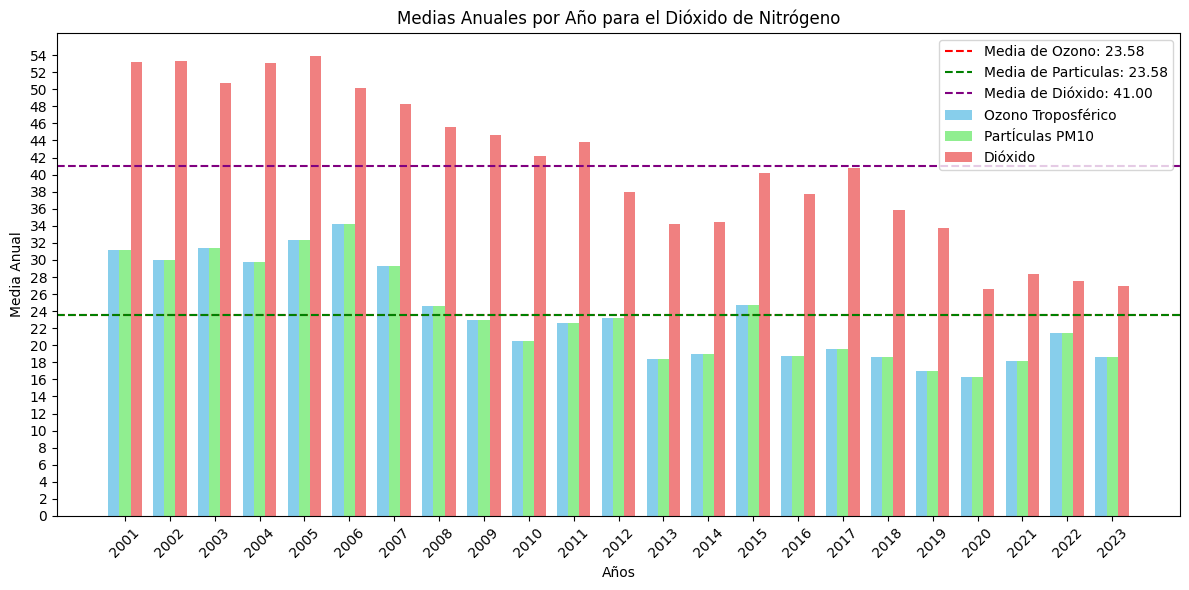

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos para las tres tablas
años = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
        '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
        '2021', '2022', '2023']

tabla1 = [31.136559139784946, 29.96720430107527, 31.419086021505375, 29.71989247311828,
                  32.359318996415766, 34.16577060931899, 29.290770609318987, 24.606182795698924,
                  22.956160394265236, 20.494766210492017, 22.56070788530465, 23.194444444444443,
                  18.349014336917566, 18.9706541218638, 24.674059139784948, 18.716621863799283,
                  19.54681899641577, 18.567204301075268, 17.015508684863523, 16.331885856079406,
                  18.1126964433416, 21.453887510339126, 18.660669975186103]

tabla2 = [31.136559139784946, 29.96720430107527, 31.419086021505375, 29.71989247311828,
                  32.359318996415766, 34.16577060931899, 29.290770609318987, 24.606182795698924,
                  22.956160394265236, 20.494766210492017, 22.56070788530465, 23.194444444444443,
                  18.349014336917566, 18.9706541218638, 24.674059139784948, 18.716621863799283,
                  19.54681899641577, 18.567204301075268, 17.015508684863523, 16.331885856079406,
                  18.1126964433416, 21.453887510339126, 18.660669975186103]

tabla3 =[53.21732241772563, 53.36233300749429, 50.72208436724565, 53.090984284532674,
                  53.92269782189137, 50.183793580971006, 48.33076735092863, 45.53225806451613,
                  44.59134123045413, 42.2286845488546, 43.7679211469534, 37.970990143369185,
                  34.213373655913976, 34.39471326164875, 40.176971326164875, 37.68402777777777,
                  40.75168010752688, 35.84330197132616, 33.696796594982075, 26.59711021505376,
                  28.313605462053914, 27.50047724793517, 26.93736364344709]

# Convertir valores 'None' a 'nan'
tabla1 = [valor if valor is not None else float('nan') for valor in tabla1]
tabla2 = [valor if valor is not None else float('nan') for valor in tabla2]
tabla3 = [valor if valor is not None else float('nan') for valor in tabla3]

# Calcular el punto medio para cada tabla
punto_medio1 = np.nanmean(tabla1)
punto_medio2 = np.nanmean(tabla2)
punto_medio3 = np.nanmean(tabla3)

# Crear el gráfico de barras combinado
plt.figure(figsize=(12, 6))

# Configurar ancho de las barras
bar_width = 0.25

# Configurar posición de las barras para cada tabla
bar_positions1 = np.arange(len(años))
bar_positions2 = bar_positions1 + bar_width
bar_positions3 = bar_positions1 + 2 * bar_width

# Graficar las barras para cada tabla
plt.bar(bar_positions1, tabla1, width=bar_width, color='skyblue', label='Ozono Troposférico')
plt.bar(bar_positions2, tabla2, width=bar_width, color='lightgreen', label='PartÍculas PM10')
plt.bar(bar_positions3, tabla3, width=bar_width, color='lightcoral', label='Dióxido')

# Graficar las líneas de puntos medios
plt.axhline(y=punto_medio1, color='red', linestyle='--', label=f'Media de Ozono: {punto_medio1:.2f}')
plt.axhline(y=punto_medio2, color='green', linestyle='--', label=f'Media de Particulas: {punto_medio2:.2f}')
plt.axhline(y=punto_medio3, color='purple', linestyle='--', label=f'Media de Dióxido: {punto_medio3:.2f}')

# Configurar detalles del gráfico
plt.title('Medias Anuales por Año para el Dióxido de Nitrógeno')
plt.xlabel('Años')
plt.ylabel('Media Anual')
plt.xticks(bar_positions1 + bar_width, años, rotation=45)
plt.yticks(np.arange(0, max(max(tabla1), max(tabla2), max(tabla3)) + 2, 2))
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
num_estaciones = base_de_datos['ESTACION'].nunique()

print(f'Número de estaciones: {num_estaciones}')

Número de estaciones: 24


# PRE-POST COVID

## Magnitud 8 (Dióxido de Niotrógeno)

In [ ]:
# Filtrar datos para la magnitud 8 en 2019
datos_2019_mag8 = base_de_datos[(base_de_datos['ANO'] == 2019) & (base_de_datos['MAGNITUD'] == 8)]

# Iterar sobre todas las estaciones
for estacion in datos_2019_mag8['ESTACION'].unique():
    datos_estacion = datos_2019_mag8[datos_2019_mag8['ESTACION'] == estacion]
    medias_por_dia = {}

# Iterar sobre los días del mes
    for dia in range(1, 32):
        dia_str = f'D{dia:02d}'
        media_dia = datos_estacion[dia_str].mean()
        medias_por_dia[dia_str] = media_dia

    # Calcular la media mensual
    media_mensual = sum(medias_por_dia.values()) / len(medias_por_dia)

    # Imprimir resultados para cada estación
    print(f"Estación: {estacion}, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2019: {media_mensual}")



Estación: 4, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2019: 38.84677419354839
Estación: 8, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2019: 48.50268817204301
Estación: 11, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2019: 38.51881720430108
Estación: 16, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2019: 33.642473118279575
Estación: 17, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2019: 38.49193548387096
Estación: 18, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2019: 31.658602150537636
Estación: 24, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2019: 20.099462365591396
Estación: 27, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2019: 34.93817204301076
Estación: 35, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2019: 35.21774193548387
Estación: 36, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2019: 35.31720430107527
Estación: 38, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2019: 36.08333333333332
Estación: 39, Media 

In [ ]:
# Filtrar datos para la magnitud 8 en 2019
datos_2019_mag8 = base_de_datos[(base_de_datos['ANO'] == 2019) & (base_de_datos['MAGNITUD'] == 8)]

# Crear un diccionario para almacenar los resultados
resultados = {'Estacion': [], 'Media_Mensual_Magnitud_8_2019': []}

# Iterar sobre todas las estaciones
for estacion in datos_2019_mag8['ESTACION'].unique():
    datos_estacion = datos_2019_mag8[datos_2019_mag8['ESTACION'] == estacion]
    medias_por_dia = {}

    # Iterar sobre los días del mes
    for dia in range(1, 32):
        dia_str = f'D{dia:02d}'
        media_dia = datos_estacion[dia_str].mean()
        medias_por_dia[dia_str] = media_dia

    # Calcular la media mensual
    media_mensual = sum(medias_por_dia.values()) / len(medias_por_dia)

    # Almacenar resultados en el diccionario
    resultados['Estacion'].append(estacion)
    resultados['Media_Mensual_Magnitud_8_2019'].append(media_mensual)

# Crear DataFrame a partir del diccionario de resultados
resultados_df = pd.DataFrame(resultados)

# Estación con el mayor y menor valor
estacion_max = resultados_df.loc[resultados_df['Media_Mensual_Magnitud_8_2019'].idxmax()]
estacion_min = resultados_df.loc[resultados_df['Media_Mensual_Magnitud_8_2019'].idxmin()]
print(f"Estación con mayor media mensual en 2019: {estacion_max['Estacion']} -> {estacion_max['Media_Mensual_Magnitud_8_2019']}")
print(f"Estación con menor media mensual en 2019: {estacion_min['Estacion']} -> {estacion_min['Media_Mensual_Magnitud_8_2019']}")


Estación con mayor media mensual en 2019: 56.0 -> 52.18010752688172
Estación con menor media mensual en 2019: 58.0 -> 15.53763440860215


In [ ]:
# Filtrar datos para la magnitud 8 en 2019
datos_2022_mag8 = base_de_datos[(base_de_datos['ANO'] == 2022) & (base_de_datos['MAGNITUD'] == 8)]

# Iterar sobre todas las estaciones
for estacion in datos_2022_mag8['ESTACION'].unique():
    datos_estacion = datos_2022_mag8[datos_2022_mag8['ESTACION'] == estacion]
    medias_por_dia = {}

# Iterar sobre los días del mes
    for dia in range(1, 32):
        dia_str = f'D{dia:02d}'
        media_dia = datos_estacion[dia_str].mean()
        medias_por_dia[dia_str] = media_dia

    # Calcular la media mensual
    media_mensual = sum(medias_por_dia.values()) / len(medias_por_dia)

    # Imprimir resultados para cada estación
    print(f"Estación: {estacion}, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2022: {media_mensual}")



Estación: 4, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2022: 22.32903225806451
Estación: 8, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2022: 33.63440860215054
Estación: 11, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2022: 30.314516129032267
Estación: 16, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2022: 25.264516129032263
Estación: 17, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2022: 34.51612903225807
Estación: 18, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2022: 27.521505376344088
Estación: 24, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2022: 16.81451612903226
Estación: 27, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2022: 29.51881720430107
Estación: 35, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2022: 30.846774193548388
Estación: 36, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2022: 27.392473118279568
Estación: 38, Media Mensual Magnitud 8 (Dióxido de Nitrógeno) en 2022: 29.129032258064516
Estación: 39, Med

In [ ]:
# Filtrar datos para la magnitud 8 en 2022
datos_2022_mag8 = base_de_datos[(base_de_datos['ANO'] == 2022) & (base_de_datos['MAGNITUD'] == 8)]

# Diccionario para almacenar las medias por estación
medias_por_estacion = {}

# Iterar sobre todas las estaciones
for estacion in datos_2022_mag8['ESTACION'].unique():
    datos_estacion = datos_2022_mag8[datos_2022_mag8['ESTACION'] == estacion]
    medias_por_dia = {}

    # Iterar sobre los días del mes
    for dia in range(1, 32):
        dia_str = f'D{dia:02d}'
        media_dia = datos_estacion[dia_str].mean()
        medias_por_dia[dia_str] = media_dia

    # Calcular la media mensual
    media_mensual = sum(medias_por_dia.values()) / len(medias_por_dia)

    # Almacenar la media mensual por estación
    medias_por_estacion[estacion] = media_mensual

# Estación con el mayor y menor valor
estacion_max = max(medias_por_estacion, key=medias_por_estacion.get)
estacion_min = min(medias_por_estacion, key=medias_por_estacion.get)
print(f"Estación con mayor media en 2022: {estacion_max} -> {medias_por_estacion[estacion_max]}")
print(f"Estación con menor media en 2022: {estacion_min} -> {medias_por_estacion[estacion_min]}")




Estación con mayor media en 2022: 56 -> 39.06989247311828
Estación con menor media en 2022: 58 -> 14.158602150537634


## Magnitud 14 (Ozono Troposférico)

In [ ]:
# Filtrar datos para la magnitud 8 en 2019
datos_2019_mag14 = base_de_datos[(base_de_datos['ANO'] == 2019) & (base_de_datos['MAGNITUD'] == 14)]

# Iterar sobre todas las estaciones
for estacion in datos_2019_mag14['ESTACION'].unique():
    datos_estacion = datos_2019_mag14[datos_2019_mag14['ESTACION'] == estacion]
    medias_por_dia = {}

# Iterar sobre los días del mes
    for dia in range(1, 32):
        dia_str = f'D{dia:02d}'
        media_dia = datos_estacion[dia_str].mean()
        medias_por_dia[dia_str] = media_dia

    # Calcular la media mensual
    media_mensual = sum(medias_por_dia.values()) / len(medias_por_dia)

    # Imprimir resultados para cada estación
    print(f"Estación: {estacion}, Media Mensual Magnitud 14 (Ozono Troposférico) en 2019: {media_mensual}")



Estación: 8, Media Mensual Magnitud 14 (Ozono Troposférico) en 2019: 43.295698924731184
Estación: 16, Media Mensual Magnitud 14 (Ozono Troposférico) en 2019: 34.06182795698924
Estación: 17, Media Mensual Magnitud 14 (Ozono Troposférico) en 2019: 48.76075268817204
Estación: 18, Media Mensual Magnitud 14 (Ozono Troposférico) en 2019: 54.92204301075269
Estación: 24, Media Mensual Magnitud 14 (Ozono Troposférico) en 2019: 57.59408602150539
Estación: 27, Media Mensual Magnitud 14 (Ozono Troposférico) en 2019: 50.983870967741936
Estación: 35, Media Mensual Magnitud 14 (Ozono Troposférico) en 2019: 43.752688172043015
Estación: 39, Media Mensual Magnitud 14 (Ozono Troposférico) en 2019: 52.91129032258065
Estación: 49, Media Mensual Magnitud 14 (Ozono Troposférico) en 2019: 53.31182795698925
Estación: 54, Media Mensual Magnitud 14 (Ozono Troposférico) en 2019: 50.827956989247305
Estación: 56, Media Mensual Magnitud 14 (Ozono Troposférico) en 2019: 45.84139784946236
Estación: 58, Media Mensual M

In [ ]:

# Estación con el mayor y menor valor
estacion_max = resultados_df.loc[resultados_df['Media_Mensual_Magnitud_8_2019'].idxmax()]
estacion_min = resultados_df.loc[resultados_df['Media_Mensual_Magnitud_8_2019'].idxmin()]
print(f"Estación con mayor media mensual en 2019: {estacion_max['Estacion']} -> {estacion_max['Media_Mensual_Magnitud_8_2019']}")
print(f"Estación con menor media mensual en 2019: {estacion_min['Estacion']} -> {estacion_min['Media_Mensual_Magnitud_8_2019']}")


Estación con mayor media mensual en 2019: 56.0 -> 52.18010752688172
Estación con menor media mensual en 2019: 58.0 -> 15.53763440860215


In [ ]:
# Filtrar datos para la magnitud 8 en 2019
datos_2022_mag14 = base_de_datos[(base_de_datos['ANO'] == 2022) & (base_de_datos['MAGNITUD'] == 14)]

# Iterar sobre todas las estaciones
for estacion in datos_2022_mag14['ESTACION'].unique():
    datos_estacion = datos_2022_mag14[datos_2022_mag14['ESTACION'] == estacion]
    medias_por_dia = {}

# Iterar sobre los días del mes
    for dia in range(1, 32):
        dia_str = f'D{dia:02d}'
        media_dia = datos_estacion[dia_str].mean()
        medias_por_dia[dia_str] = media_dia

    # Calcular la media mensual
    media_mensual = sum(medias_por_dia.values()) / len(medias_por_dia)

    # Imprimir resultados para cada estación
    print(f"Estación: {estacion}, Media Mensual Magnitud 14 (Ozono Troposférico) en 2022: {media_mensual}")


Estación: 8, Media Mensual Magnitud 14 (Ozono Troposférico) en 2022: 49.096048387096765
Estación: 16, Media Mensual Magnitud 14 (Ozono Troposférico) en 2022: 37.57703225806452
Estación: 17, Media Mensual Magnitud 14 (Ozono Troposférico) en 2022: 50.6915322580645
Estación: 18, Media Mensual Magnitud 14 (Ozono Troposférico) en 2022: 48.617231182795706
Estación: 24, Media Mensual Magnitud 14 (Ozono Troposférico) en 2022: 57.721935483870986
Estación: 27, Media Mensual Magnitud 14 (Ozono Troposférico) en 2022: 46.8956989247312
Estación: 35, Media Mensual Magnitud 14 (Ozono Troposférico) en 2022: 53.29064516129032
Estación: 39, Media Mensual Magnitud 14 (Ozono Troposférico) en 2022: 52.84706989247312
Estación: 49, Media Mensual Magnitud 14 (Ozono Troposférico) en 2022: 48.4524193548387
Estación: 54, Media Mensual Magnitud 14 (Ozono Troposférico) en 2022: 51.21623655913979
Estación: 58, Media Mensual Magnitud 14 (Ozono Troposférico) en 2022: 54.620295698924735
Estación: 59, Media Mensual Magn

## Magnitud 9 (Partículas PM10)

In [ ]:
# Filtrar datos para la magnitud 8 en 2019
datos_2019_mag9 = base_de_datos[(base_de_datos['ANO'] == 2019) & (base_de_datos['MAGNITUD'] == 9)]

# Iterar sobre todas las estaciones
for estacion in datos_2019_mag9['ESTACION'].unique():
    datos_estacion = datos_2019_mag9[datos_2019_mag9['ESTACION'] == estacion]
    medias_por_dia = {}

# Iterar sobre los días del mes
    for dia in range(1, 32):
        dia_str = f'D{dia:02d}'
        media_dia = datos_estacion[dia_str].mean()
        medias_por_dia[dia_str] = media_dia

    # Calcular la media mensual
    media_mensual = sum(medias_por_dia.values()) / len(medias_por_dia)

    # Imprimir resultados para cada estación
    print(f"Estación: {estacion}, Media Mensual Magnitud 9 (PM10) en 2019: {media_mensual}")



Estación: 8, Media Mensual Magnitud 9 (PM10) en 2019: 9.881720430107526
Estación: 24, Media Mensual Magnitud 9 (PM10) en 2019: 8.682795698924732
Estación: 38, Media Mensual Magnitud 9 (PM10) en 2019: 9.051075268817206
Estación: 47, Media Mensual Magnitud 9 (PM10) en 2019: 9.524193548387096
Estación: 48, Media Mensual Magnitud 9 (PM10) en 2019: 9.266129032258064
Estación: 50, Media Mensual Magnitud 9 (PM10) en 2019: 8.766129032258062
Estación: 56, Media Mensual Magnitud 9 (PM10) en 2019: 11.59139784946237


In [ ]:
# Filtrar datos para la magnitud 8 en 2019
datos_2022_mag9 = base_de_datos[(base_de_datos['ANO'] == 2022) & (base_de_datos['MAGNITUD'] == 9)]

# Iterar sobre todas las estaciones
for estacion in datos_2022_mag9['ESTACION'].unique():
    datos_estacion = datos_2022_mag9[datos_2022_mag9['ESTACION'] == estacion]
    medias_por_dia = {}

# Iterar sobre los días del mes
    for dia in range(1, 32):
        dia_str = f'D{dia:02d}'
        media_dia = datos_estacion[dia_str].mean()
        medias_por_dia[dia_str] = media_dia

    # Calcular la media mensual
    media_mensual = sum(medias_por_dia.values()) / len(medias_por_dia)

    # Imprimir resultados para cada estación
    print(f"Estación: {estacion}, Media Mensual Magnitud 9 (PM10) en 2022: {media_mensual}")

Estación: 8, Media Mensual Magnitud 9 (PM10) en 2022: 13.870967741935484
Estación: 24, Media Mensual Magnitud 9 (PM10) en 2022: 9.040322580645162
Estación: 38, Media Mensual Magnitud 9 (PM10) en 2022: 10.903225806451612
Estación: 47, Media Mensual Magnitud 9 (PM10) en 2022: 9.561827956989248
Estación: 48, Media Mensual Magnitud 9 (PM10) en 2022: 9.185483870967742
Estación: 50, Media Mensual Magnitud 9 (PM10) en 2022: 9.155913978494626
Estación: 56, Media Mensual Magnitud 9 (PM10) en 2022: 11.20161290322581
Estación: 57, Media Mensual Magnitud 9 (PM10) en 2022: 7.991935483870969


In [ ]:
print(base_de_datos.columns)


Index(['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO',
       'ANO', 'MES', 'D01', 'V01', 'D02', 'V02', 'D03', 'V03', 'D04', 'V04',
       'D05', 'V05', 'D06', 'V06', 'D07', 'V07', 'D08', 'V08', 'D09', 'V09',
       'D10', 'V10', 'D11', 'V11', 'D12', 'V12', 'D13', 'V13', 'D14', 'V14',
       'D15', 'V15', 'D16', 'V16', 'D17', 'V17', 'D18', 'V18', 'D19', 'V19',
       'D20', 'V20', 'D21', 'V21', 'D22', 'V22', 'D23', 'V23', 'D24', 'V24',
       'D25', 'V25', 'D26', 'V26', 'D27', 'V27', 'D28', 'V28', 'D29', 'V29',
       'D30', 'V30', 'D31', 'V31'],
      dtype='object')
